In [ ]:
def rst_transform(self, r, s, t):
        r"""
        
        """
        return self.change_weierstrass_model(1, r, s, t)

    def scale_curve(self, u):
        r"""
        Return the transform of the curve by scale factor `u`.

        INPUT:

        - ``u`` -- an invertible element of the base ring.

        OUTPUT:

        The elliptic curve obtained from ``self`` by the standard
        Weierstrass transformation `(u,r,s,t)` with `r=s=t=0`.

        .. NOTE::

            This is just a special case of
            :meth:`change_weierstrass_model`, with `r=s=t=0`.

        EXAMPLES::

            sage: K = Frac(PolynomialRing(QQ, 'u'))
            sage: u = K.gen()
            sage: E = EllipticCurve([1,2,3,4,5])
            sage: E.scale_curve(u)
            Elliptic Curve defined by
            y^2 + u*x*y + 3*u^3*y = x^3 + 2*u^2*x^2 + 4*u^4*x + 5*u^6
            over Fraction Field of Univariate Polynomial Ring in u over Rational Field
        """
        if isinstance(u, int):
            u = self.base_ring()(u)     # because otherwise 1/u would round!
        return self.change_weierstrass_model(1/u, 0, 0, 0)

    def isomorphism(self, u, r=0, s=0, t=0, *, is_codomain=False):
        r"""
        Given four values `u,r,s,t` in the base ring of this curve, return
        the :class:`WeierstrassIsomorphism` defined by `u,r,s,t` with this
        curve as its codomain.
        (The value `u` must be a unit; the values `r,s,t` default to zero.)

        Optionally, if the keyword argument ``is_codomain`` is set to ``True``,
        return the isomorphism defined by `u,r,s,t` with this curve as its
        **co**\domain.

        EXAMPLES::

            sage: E = EllipticCurve([1, 2, 3, 4, 5])
            sage: iso = E.isomorphism(6); iso
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
              To:   Elliptic Curve defined by y^2 + 1/6*x*y + 1/72*y = x^3 + 1/18*x^2 + 1/324*x + 5/46656 over Rational Field
              Via:  (u,r,s,t) = (6, 0, 0, 0)
            sage: iso.domain() == E
            True
            sage: iso.codomain() == E.scale_curve(1 / 6)
            True

            sage: iso = E.isomorphism(1, 7, 8, 9); iso
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
              To:   Elliptic Curve defined by y^2 + 17*x*y + 28*y = x^3 - 49*x^2 - 54*x + 303 over Rational Field
              Via:  (u,r,s,t) = (1, 7, 8, 9)
            sage: iso.domain() == E
            True
            sage: iso.codomain() == E.rst_transform(7, 8, 9)
            True

            sage: iso = E.isomorphism(6, 7, 8, 9); iso
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
              To:   Elliptic Curve defined by y^2 + 17/6*x*y + 7/54*y = x^3 - 49/36*x^2 - 1/24*x + 101/15552 over Rational Field
              Via:  (u,r,s,t) = (6, 7, 8, 9)
            sage: iso.domain() == E
            True
            sage: iso.codomain() == E.rst_transform(7, 8, 9).scale_curve(1 / 6)
            True

        The ``is_codomain`` argument reverses the role of domain and codomain::

            sage: E = EllipticCurve([1, 2, 3, 4, 5])
            sage: iso = E.isomorphism(6, is_codomain=True); iso
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 + 6*x*y + 648*y = x^3 + 72*x^2 + 5184*x + 233280 over Rational Field
              To:   Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
              Via:  (u,r,s,t) = (6, 0, 0, 0)
            sage: iso.domain() == E.scale_curve(6)
            True
            sage: iso.codomain() == E
            True

            sage: iso = E.isomorphism(1, 7, 8, 9, is_codomain=True); iso
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 - 15*x*y + 90*y = x^3 - 75*x^2 + 796*x - 2289 over Rational Field
              To:   Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
              Via:  (u,r,s,t) = (1, 7, 8, 9)
            sage: iso.domain().rst_transform(7, 8, 9) == E
            True
            sage: iso.codomain() == E
            True

            sage: iso = E.isomorphism(6, 7, 8, 9, is_codomain=True); iso
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 - 10*x*y + 700*y = x^3 + 35*x^2 + 9641*x + 169486 over Rational Field
              To:   Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
              Via:  (u,r,s,t) = (6, 7, 8, 9)
            sage: iso.domain().rst_transform(7, 8, 9) == E.scale_curve(6)
            True
            sage: iso.codomain() == E
            True

        .. SEEALSO::

            - :class:`~sage.schemes.elliptic_curves.weierstrass_morphism.WeierstrassIsomorphism`
            - :meth:`rst_transform`
            - :meth:`scale_curve`
        """
        from sage.schemes.elliptic_curves.weierstrass_morphism import WeierstrassIsomorphism
        if is_codomain:
            return WeierstrassIsomorphism(None, (u,r,s,t), self)
        return WeierstrassIsomorphism(self, (u,r,s,t))

# ###########################################################
#
# Explanation of the division (also known as torsion) polynomial
# functions in Sage.
#
# The main user function division_polynomial() (also aliased as
# torsion_polynomial()) is used to compute polynomials whose roots
# determine the m-torsion points on the curve.  Three options are
# available, which effect the result when m is even and also the
# parent ring of the returned value.  The function can return either a
# polynomial or the evaluation of that polynomial at a point,
# depending on the input.  Values are cached.
#
# The options are controlled by the value of the parameter
# two_torsion_multiplicity, which may be 0, 1 or 2.  If it is 0 or 2,
# then a univariate polynomial will be returned (or evaluated at the
# parameter x if x is not None).  This is the polynomial whose roots
# are the values of x(P) at the nonzero points P where m*P=0
# (when two_torsion_multiplicity==2), or the points where m*P=0 but
# 2*P\not=0 (when two_torsion_multiplicity==0).
#
# If two_torsion_multiplicity==1, then a bivariate polynomial is
# returned, which (as a function on the curve) has a simple zero at
# each nonzero point P such that m*P=0.  When m is odd this is a
# polynomial in x alone, but is still returned as an element of a
# polynomial ring in two variables; when m is even it has a factor
# 2y+a_1x+a_3.  In this case if the parameter x is not None then it
# should be a tuple of length 2, or a point P on the curve, and the
# returned value is the value of the bivariate polynomial at this
# point.
#
# Comparison with Magma: Magma's function DivisionPolynomial(E,m)
# returns a triple of univariate polynomials f,g,h where f is
# \code{E.division_polynomial(m,two_torsion_multiplicity=2)}, g is
# \code{E.division_polynomial(m,two_torsion_multiplicity=0)} and h
# is the quotient, so that h=1 when m is odd.

# ###########################################################

    def division_polynomial_0(self, n, x=None):
        r"""
        Return the `n^{th}` torsion (division) polynomial, without
        the 2-torsion factor if `n` is even, as a polynomial in `x`.

        These are the polynomials `g_n` defined in [MT1991]_, but with
        the sign flipped for even `n`, so that the leading coefficient is
        always positive.

        .. NOTE::

            This function is intended for internal use; users should use
            :meth:`division_polynomial`.

        .. SEEALSO::

            - :meth:`division_polynomial`
            - :meth:`_multiple_x_numerator`
            - :meth:`_multiple_x_denominator`

        INPUT:

        - ``n`` -- positive integer, or the special values ``-1`` and ``-2``
          which mean `B_6 = (2y + a_1 x + a_3)^2` and `B_6^2` respectively (in
          the notation of [MT1991]_); or a list of integers.

        - ``x`` -- a ring element to use as the "x" variable or ``None``
          (default: ``None``). If ``None``, then a new polynomial ring will
          be constructed over the base ring of the elliptic curve, and its
          generator will be used as ``x``. Note that ``x`` does not need to
          be a generator of a polynomial ring; any ring element is ok. This
          permits fast calculation of the torsion polynomial *evaluated* on
          any element of a ring.

        ALGORITHM:

        Recursion described in [MT1991]_. The recursive
        formulae are evaluated `O(\log^2 n)` times.

        AUTHORS:

        - David Harvey (2006-09-24): initial version

        - John Cremona (2008-08-26): unified division polynomial code

        EXAMPLES::

            sage: E = EllipticCurve("37a")
            sage: E.division_polynomial_0(1)
            1
            sage: E.division_polynomial_0(2)
            1
            sage: E.division_polynomial_0(3)
            3*x^4 - 6*x^2 + 3*x - 1
            sage: E.division_polynomial_0(4)
            2*x^6 - 10*x^4 + 10*x^3 - 10*x^2 + 2*x + 1
            sage: E.division_polynomial_0(5)
            5*x^12 - 62*x^10 + 95*x^9 - 105*x^8 - 60*x^7 + 285*x^6 - 174*x^5 - 5*x^4 - 5*x^3 + 35*x^2 - 15*x + 2
            sage: E.division_polynomial_0(6)
            3*x^16 - 72*x^14 + 168*x^13 - 364*x^12 + 1120*x^10 - 1144*x^9 + 300*x^8 - 540*x^7 + 1120*x^6 - 588*x^5 - 133*x^4 + 252*x^3 - 114*x^2 + 22*x - 1
            sage: E.division_polynomial_0(7)
            7*x^24 - 308*x^22 + 986*x^21 - 2954*x^20 + 28*x^19 + 17171*x^18 - 23142*x^17 + 511*x^16 - 5012*x^15 + 43804*x^14 - 7140*x^13 - 96950*x^12 + 111356*x^11 - 19516*x^10 - 49707*x^9 + 40054*x^8 - 124*x^7 - 18382*x^6 + 13342*x^5 - 4816*x^4 + 1099*x^3 - 210*x^2 + 35*x - 3
            sage: E.division_polynomial_0(8)
            4*x^30 - 292*x^28 + 1252*x^27 - 5436*x^26 + 2340*x^25 + 39834*x^24 - 79560*x^23 + 51432*x^22 - 142896*x^21 + 451596*x^20 - 212040*x^19 - 1005316*x^18 + 1726416*x^17 - 671160*x^16 - 954924*x^15 + 1119552*x^14 + 313308*x^13 - 1502818*x^12 + 1189908*x^11 - 160152*x^10 - 399176*x^9 + 386142*x^8 - 220128*x^7 + 99558*x^6 - 33528*x^5 + 6042*x^4 + 310*x^3 - 406*x^2 + 78*x - 5

        ::

            sage: E.division_polynomial_0(18) % E.division_polynomial_0(6) == 0
            True

        An example to illustrate the relationship with torsion points::

            sage: F = GF(11)
            sage: E = EllipticCurve(F, [0, 2]); E
            Elliptic Curve defined by y^2  = x^3 + 2 over Finite Field of size 11
            sage: f = E.division_polynomial_0(5); f
            5*x^12 + x^9 + 8*x^6 + 4*x^3 + 7
            sage: f.factor()
            (5) * (x^2 + 5) * (x^2 + 2*x + 5) * (x^2 + 5*x + 7)
             * (x^2 + 7*x + 7) * (x^2 + 9*x + 5) * (x^2 + 10*x + 7)

        This indicates that the `x`-coordinates of all the 5-torsion points of
        `E` are in `\GF{11^2}`, and therefore the `y`-coordinates are in
        `\GF{11^4}`::

            sage: # needs sage.rings.finite_rings
            sage: K = GF(11^4, 'a')
            sage: X = E.change_ring(K)
            sage: f = X.division_polynomial_0(5)
            sage: x_coords = f.roots(multiplicities=False); x_coords
            [10*a^3 + 4*a^2 + 5*a + 6,
             9*a^3 + 8*a^2 + 10*a + 8,
             8*a^3 + a^2 + 4*a + 10,
             8*a^3 + a^2 + 4*a + 8,
             8*a^3 + a^2 + 4*a + 4,
             6*a^3 + 9*a^2 + 3*a + 4,
             5*a^3 + 2*a^2 + 8*a + 7,
             3*a^3 + 10*a^2 + 7*a + 8,
             3*a^3 + 10*a^2 + 7*a + 3,
             3*a^3 + 10*a^2 + 7*a + 1,
             2*a^3 + 3*a^2 + a + 7,
             a^3 + 7*a^2 + 6*a]

        Now we check that these are exactly the `x`-coordinates of the
        5-torsion points of `E`::

            sage: for x in x_coords:                                                    # needs sage.rings.finite_rings
            ....:     assert X.lift_x(x).order() == 5

        The roots of the polynomial are the `x`-coordinates of the points `P`
        such that `mP=0` but `2P\not=0`::

            sage: E = EllipticCurve('14a1')
            sage: T = E.torsion_subgroup()
            sage: [n*T.0 for n in range(6)]
            [(0 : 1 : 0),
            (9 : 23 : 1),
            (2 : 2 : 1),
            (1 : -1 : 1),
            (2 : -5 : 1),
            (9 : -33 : 1)]
            sage: pol = E.division_polynomial_0(6)
            sage: xlist = pol.roots(multiplicities=False); xlist
            [9, 2, -1/3, -5]
            sage: [E.lift_x(x, all=True) for x in xlist]
            [[(9 : -33 : 1), (9 : 23 : 1)], [(2 : -5 : 1), (2 : 2 : 1)], [], []]

        .. NOTE::

            The point of order 2 and the identity do not appear.
            The points with `x=-1/3` and `x=-5` are not rational.
        """
        if x is None:
            # The generic division polynomials should be cached "forever".
            cache = self.__divpolys[0]
            x = polygen(self.base_ring())
        else:
            # For other inputs, we use a temporary cache.
            cache = {}

        b2, b4, b6, b8 = self.b_invariants()

        def poly(n):
            try:
                return cache[n]
            except KeyError:
                pass
            if n == -2:
                ret = poly(-1)**2
            elif n == -1:
                ret = 4*x**3 + b2*x**2 + 2*b4*x + b6
            elif n <= 0:
                raise ValueError("n must be a positive integer (or -1 or -2)")
            elif n == 1 or n == 2:
                ret = x.parent().one()
            elif n == 3:
                ret = 3*x**4 + b2*x**3 + 3*b4*x**2 + 3*b6*x + b8
            elif n == 4:
                ret = -poly(-2) + (6*x**2 + b2*x + b4) * poly(3)
            elif n % 2 == 0:
                m = (n-2) // 2
                ret = poly(m+1) * (poly(m+3) * poly(m)**2 - poly(m-1) * poly(m+2)**2)
            else:
                m = (n-1) // 2
                if m % 2 == 0:
                    ret = poly(-2) * poly(m+2) * poly(m)**3 - poly(m-1) * poly(m+1)**3
                else:
                    ret = poly(m+2) * poly(m)**3 - poly(-2) * poly(m-1) * poly(m+1)**3
            cache[n] = ret
            return ret

        if not isinstance(n, (list, tuple)):
            return poly(int(n))
        else:
            return [poly(int(k)) for k in n]

    def two_division_polynomial(self, x=None):
        r"""
        Return the 2-division polynomial of this elliptic curve evaluated
        at ``x``.

        INPUT:

        - ``x`` -- optional ring element to use as the `x` variable.
          If ``x`` is ``None``, then a new polynomial ring will be
          constructed over the base ring of the elliptic curve, and
          its generator will be used as ``x``. Note that ``x`` does
          not need to be a generator of a polynomial ring; any ring
          element is acceptable. This permits fast calculation of the
          torsion polynomial *evaluated* on any element of a ring.

        EXAMPLES::

            sage: E = EllipticCurve('5077a1')
            sage: E.two_division_polynomial()
            4*x^3 - 28*x + 25
            sage: E = EllipticCurve(GF(3^2,'a'), [1,1,1,1,1])                           # needs sage.rings.finite_rings
            sage: E.two_division_polynomial()                                           # needs sage.rings.finite_rings
            x^3 + 2*x^2 + 2
            sage: E.two_division_polynomial().roots()                                   # needs sage.rings.finite_rings
            [(2, 1), (2*a, 1), (a + 2, 1)]
        """
        return self.division_polynomial_0(-1,x)

    def division_polynomial(self, m, x=None, two_torsion_multiplicity=2, force_evaluate=None):
        r"""
        Return the `m^{th}` division polynomial of this elliptic
        curve evaluated at `x`.

        The division polynomial is cached if `x` is ``None``.

        INPUT:

        - ``m`` -- positive integer.

        - ``x`` -- optional ring element to use as the `x` variable.
          If `x` is ``None`` (omitted), then a new polynomial ring will be
          constructed over the base ring of the elliptic curve, and its
          generator will be used as `x`. Note that `x` does not need to
          be a generator of a polynomial ring; any ring element works. This
          permits fast calculation of the torsion polynomial *evaluated* on
          any element of a ring.

        - ``two_torsion_multiplicity`` -- 0, 1, or 2

          If 0: For even `m` when `x` is ``None``, a univariate polynomial
          over the base ring of the curve is returned, which omits factors
          whose roots are the `x`-coordinates of the `2`-torsion points.
          When `x` is not ``None``, the evaluation of such a polynomial at
          `x` is returned.

          If 2: For even `m` when `x` is ``None``, a univariate polynomial
          over the base ring of the curve is returned, which includes a
          factor of degree 3 whose roots are the `x`-coordinates of the
          `2`-torsion points.
          Similarly, when `x` is not ``None``, the evaluation of such a
          polynomial at `x` is returned.

          If 1: For even `m` when `x` is ``None``, a bivariate polynomial
          over the base ring of the curve is returned, which includes a
          factor `2y+a_1x+a_3` having simple zeros at the `2`-torsion points.
          When `x` is not ``None``, it should be a tuple of length 2, and
          the evaluation of such a polynomial at `x` is returned.

        - ``force_evaluate`` (optional) -- 0, 1, or 2

          By default, this method makes use of previously cached generic
          division polynomials to compute the value of the polynomial at
          a given element `x` whenever it appears beneficial to do so.
          Explicitly setting this flag overrides the default behavior.

          Note that the complexity of evaluating a generic division
          polynomial scales much worse than that of computing the value
          at a point directly (using the recursive formulas), hence
          setting this flag can be detrimental to performance.

          If 0: Do not use cached generic division polynomials.

          If 1: If the generic division polynomial for this `m` has been
          cached before, evaluate it at `x` to compute the result.

          If 2: Compute the value at `x` by evaluating the generic
          division polynomial. If the generic `m`-division polynomial
          has not yet been cached, compute and cache it first.

        EXAMPLES::

            sage: E = EllipticCurve([0,0,1,-1,0])
            sage: E.division_polynomial(1)
            1
            sage: E.division_polynomial(2, two_torsion_multiplicity=0)
            1
            sage: E.division_polynomial(2, two_torsion_multiplicity=1)
            2*y + 1
            sage: E.division_polynomial(2, two_torsion_multiplicity=2)
            4*x^3 - 4*x + 1
            sage: E.division_polynomial(2)
            4*x^3 - 4*x + 1
            sage: [E.division_polynomial(3, two_torsion_multiplicity=i) for i in range(3)]
            [3*x^4 - 6*x^2 + 3*x - 1, 3*x^4 - 6*x^2 + 3*x - 1, 3*x^4 - 6*x^2 + 3*x - 1]
            sage: [type(E.division_polynomial(3, two_torsion_multiplicity=i)) for i in range(3)]
            [<... 'sage.rings.polynomial.polynomial_rational_flint.Polynomial_rational_flint'>,
             <... 'sage.rings.polynomial.multi_polynomial_libsingular.MPolynomial_libsingular'>,
             <... 'sage.rings.polynomial.polynomial_rational_flint.Polynomial_rational_flint'>]

        ::

            sage: E = EllipticCurve([0, -1, 1, -10, -20])
            sage: R.<z> = PolynomialRing(QQ)
            sage: E.division_polynomial(4, z, 0)
            2*z^6 - 4*z^5 - 100*z^4 - 790*z^3 - 210*z^2 - 1496*z - 5821
            sage: E.division_polynomial(4, z)
            8*z^9 - 24*z^8 - 464*z^7 - 2758*z^6 + 6636*z^5 + 34356*z^4
             + 53510*z^3 + 99714*z^2 + 351024*z + 459859

        This does not work, since when two_torsion_multiplicity is 1, we
        compute a bivariate polynomial, and must evaluate at a tuple of
        length 2::

            sage: E.division_polynomial(4,z,1)
            Traceback (most recent call last):
            ...
            ValueError: x should be a tuple of length 2 (or None)
            when two_torsion_multiplicity is 1
            sage: R.<z,w> = PolynomialRing(QQ, 2)
            sage: E.division_polynomial(4, (z,w), 1).factor()
            (2*w + 1) * (2*z^6 - 4*z^5 - 100*z^4 - 790*z^3 - 210*z^2 - 1496*z - 5821)

        We can also evaluate this bivariate polynomial at a point::

            sage: P = E(5,5)
            sage: E.division_polynomial(4,P,two_torsion_multiplicity=1)
            -1771561

        TESTS:

        Check that :issue:`33164` is fixed::

            sage: E = EllipticCurve('11a3')
            sage: R.<X> = QQ[]
            sage: S.<Y> = R.quotient(X^2)
            sage: E.division_polynomial(5, x=Y)
            -5*Y
            sage: E.division_polynomial(5, x=X)
            5*X^12 - 20*X^11 + 16*X^10 + 95*X^9 - 285*X^8 + 360*X^7 - 255*X^6 + 94*X^5 + 15*X^4 - 45*X^3 + 25*X^2 - 5*X

        Tests for the ``force_evaluate`` argument::

            sage: E.division_polynomial(5, x=Y, force_evaluate=0)
            -5*Y
            sage: E.division_polynomial(5, x=Y, force_evaluate=1)
            -5*Y
            sage: E.division_polynomial(5, x=Y, force_evaluate=2)
            -5*Y
            sage: E._EllipticCurve_generic__divpolys[2]
            {5: 5*x^12 - 20*x^11 + 16*x^10 + 95*x^9 - 285*x^8 + 360*x^7 - 255*x^6 + 94*x^5 + 15*x^4 - 45*x^3 + 25*x^2 - 5*x}
            sage: E._EllipticCurve_generic__divpolys[2][5] += 1  # poison cache
            sage: E.division_polynomial(5, x=Y, force_evaluate=0)
            -5*Y
            sage: E.division_polynomial(5, x=Y, force_evaluate=1)
            -5*Y + 1
            sage: E.division_polynomial(5, x=Y, force_evaluate=2)
            -5*Y + 1
        """
        if two_torsion_multiplicity not in (0, 1, 2):
            raise ValueError("two_torsion_multiplicity must be 0, 1, or 2")

        if x is not None and two_torsion_multiplicity == 1:
            if isinstance(x, ell_point.EllipticCurvePoint_field):
                x = x.xy()
            if not (isinstance(x, tuple) and len(x) == 2):
                raise ValueError("x should be a tuple of length 2 (or None) when two_torsion_multiplicity is 1")

        m = Integer(m)

        if x is None:
            try:
                return self.__divpolys[two_torsion_multiplicity][m]
            except KeyError:
                pass

        evaluate = False
        if force_evaluate is not None:
            evaluate = force_evaluate
        elif x is not None:
            # Univariate polynomials are much faster---this signals that the
            # result should first be computed as an univariate polynomial and
            # only then converted, even if it is not yet cached.
            if polynomial_is_variable(x) and x.base_ring() is self.base_ring():
                evaluate = 2

            # Evaluating a precomputed polynomial is linear in the degree,
            # while the recursive definition is only logarithmic. For small
            # inputs, evaluation can be better nevertheless.
            # The following cutoffs were estimated based on experiments in
            # January 2022 (using Sage version 9.5.rc0).
            elif x in self.base_ring():
                evaluate = m < 100
            elif isinstance(x, PolynomialQuotientRingElement) and x.lift().is_gen() \
                    and x.lift().base_ring() is self.base_ring():
                d = x.parent().modulus().degree()
                evaluate = m < 220 or \
                    (d < 10 and m < 420) or (d < 15 and m < 340) or \
                    (d < 30 and m < 280) or (d < 100 and m < 250) or \
                    m <= min(250, d)

        # Check if we should (attempt to) compute the result by simply
        # evaluating a cached polynomial at the given input.
        if evaluate:
            try:
                return self.__divpolys[two_torsion_multiplicity][m](x)
            except KeyError:
                if evaluate == 2:
                    return self.division_polynomial(m, two_torsion_multiplicity=two_torsion_multiplicity)(x)

        # If not, .division_polynomial_0() will do the real work for us.
        if two_torsion_multiplicity == 0:
            return self.division_polynomial_0(m, x)

        should_cache = x is None

        if two_torsion_multiplicity == 1:
            x,y = x if x is not None else (None,None)

        if evaluate and m in self.__divpolys[0]:
            f = self.__divpolys[0][m](x)
        else:
            f = self.division_polynomial_0(m, x)

        if two_torsion_multiplicity == 2:
            if m % 2 == 0:
                f *= self.division_polynomial_0(-1, x)
        elif two_torsion_multiplicity == 1:
            if x is y is None:
                x,y = polygens(self.base_ring(), 'x,y')
                f = f(x)
            if m % 2 == 0:
                f *= 2*y + self.a1()*x + self.a3()

        if should_cache:
            self.__divpolys[two_torsion_multiplicity][m] = f
        return f

    torsion_polynomial = division_polynomial

    def _multiple_x_numerator(self, n, x=None):
        r"""
        Return the numerator of the `x`-coordinate of the `n\th` multiple of a
        point, using torsion polynomials (division polynomials).

        INPUT:

        - ``n``, ``x`` -- as described in :meth:`division_polynomial_0`.

        If ``x`` is ``None``, the result is cached.  This is so that on calling
        ``P.division_points(n)`` for the same `n` and different points `P` (on
        the same curve), we do not have to recompute the polynomials.

        .. WARNING::

            There may of course be cancellation between the numerator and the
            denominator (:meth:`_multiple_x_denominator`). Be careful. E.g. if
            a point on an elliptic curve with coefficients in `\ZZ` reduces to
            a singular point modulo a prime, then there will be cancellation,
            otherwise not, see [Wu2004]_.

        .. SEEALSO::

            :meth:`_multiple_x_denominator`

        AUTHORS:

        - David Harvey (2006-09-24)

        EXAMPLES::

            sage: E = EllipticCurve([1,2])
            sage: E._multiple_x_numerator(3)
            x^9 - 12*x^7 - 192*x^6 + 30*x^5 - 48*x^4 + 228*x^3 + 96*x^2 + 393*x + 528
            sage: E._multiple_x_numerator(-3)
            x^9 - 12*x^7 - 192*x^6 + 30*x^5 - 48*x^4 + 228*x^3 + 96*x^2 + 393*x + 528

        ::

            sage: E = EllipticCurve("37a")
            sage: P = E.gens()[0]
            sage: x = P[0]

        ::

            sage: (35*P)[0]
            -804287518035141565236193151/1063198259901027900600665796
            sage: E._multiple_x_numerator(35, x)
            -804287518035141565236193151
            sage: E._multiple_x_denominator(35, x)
            1063198259901027900600665796

        ::

            sage: (36*P)[0]
            54202648602164057575419038802/15402543997324146892198790401
            sage: E._multiple_x_numerator(36, x)
            54202648602164057575419038802
            sage: E._multiple_x_denominator(36, x)
            15402543997324146892198790401

        An example where cancellation occurs::

            sage: E = EllipticCurve("88a1")
            sage: P = E([2,2])   # fixed choice of generator
            sage: n = E._multiple_x_numerator(11, P[0]); n
            442446784738847563128068650529343492278651453440
            sage: d = E._multiple_x_denominator(11, P[0]); d
            1427247692705959881058285969449495136382746624
            sage: n/d
            310
            sage: 11*P
            (310 : -5458 : 1)

        TESTS:

        Check that the results are cached::

            sage: E = EllipticCurve("88a1")
            sage: E._multiple_x_numerator(11) is E._multiple_x_numerator(11)
            True

        Check for :issue:`33156`::

            sage: # needs sage.rings.finite_rings
            sage: E = EllipticCurve(GF(65537), [5,5])
            sage: R.<x> = E.base_field()[]
            sage: E._multiple_x_numerator(5, x=R.quotient(x^2).gen())
            10220*xbar + 42539
            sage: E._multiple_x_numerator(5)
            x^25 + 65037*x^23 + 55137*x^22 + ... + 813*x^2 + 10220*x + 42539
        """
        n = Integer(n).abs()
        if not n:
            raise ValueError("n must be nonzero")

        if x is None:
            try:
                cache = self.__mulxnums
            except AttributeError:
                cache = self.__mulxnums = {}
            try:
                return cache[n]
            except KeyError:
                pass
            xx = polygen(self.base_ring())
        else:
            cache = None
            xx = x

        if n == 1:
            return xx

        polys = self.division_polynomial_0([-2,-1,n-1,n,n+1], x)

        if n % 2 == 0:
            ret = xx * polys[1] * polys[3]**2 - polys[2] * polys[4]
        else:
            ret = xx * polys[3]**2 - polys[1] * polys[2] * polys[4]

        if cache is not None:
            cache[n] = ret
        return ret

    def _multiple_x_denominator(self, n, x=None):
        r"""
        Return the denominator of the `x`-coordinate of the `n\th` multiple of
        a point, using torsion polynomials (division polynomials).

        INPUT:

        - ``n``, ``x`` -- as described in :meth:`division_polynomial_0`.

        If ``x`` is ``None``, the result is cached.  This is so that on calling
        ``P.division_points(n)`` for the same `n` and different points `P` (on
        the same curve), we do not have to recompute the polynomials.

        AUTHORS:

        - David Harvey (2006-09-24)

        .. SEEALSO::

            :meth:`multiple_x_numerator`

        .. TODO::

            The numerator and denominator versions share a calculation, namely
            squaring `\psi_n`. Maybe would be good to offer a combined version
            to make this more efficient.

        EXAMPLES::

            sage: E = EllipticCurve([1,2])
            sage: E._multiple_x_denominator(3)
            9*x^8 + 36*x^6 + 144*x^5 + 30*x^4 + 288*x^3 + 564*x^2 - 48*x + 1
            sage: E._multiple_x_denominator(-3)
            9*x^8 + 36*x^6 + 144*x^5 + 30*x^4 + 288*x^3 + 564*x^2 - 48*x + 1

        ::

            sage: E = EllipticCurve("43a")
            sage: P = E.gens()[0]
            sage: x = P[0]
            sage: (31*P)[0]
            -33058398375463796474831580/154693637754223970056975321
            sage: E._multiple_x_numerator(31, x)
            -33058398375463796474831580
            sage: E._multiple_x_denominator(31, x)
            154693637754223970056975321

        TESTS:

        Check that the results are cached::

            sage: E = EllipticCurve("88a1")
            sage: E._multiple_x_denominator(11) is E._multiple_x_denominator(11)
            True

        Check for :issue:`33156`::

            sage: # needs sage.rings.finite_rings
            sage: E = EllipticCurve(GF(65537), [5,5])
            sage: R.<x> = E.base_field()[]
            sage: E._multiple_x_denominator(5, x=R.quotient(x^2).gen())
            52039*xbar + 56726
            sage: E._multiple_x_denominator(5)
            25*x^24 + 3100*x^22 + 19000*x^21 + ... + 24111*x^2 + 52039*x + 56726
        """
        n = Integer(n).abs()
        if not n:
            raise ValueError("n must be nonzero")

        if x is None:
            try:
                cache = self.__mulxdens
            except AttributeError:
                cache = self.__mulxdens = {}
            try:
                return cache[n]
            except KeyError:
                pass
        else:
            cache = None

        ret = self.division_polynomial_0(n, x)**2
        if n % 2 == 0:
            ret *= self.division_polynomial_0(-1, x)

        if cache is not None:
            cache[n] = ret
        return ret

    def multiplication_by_m(self, m, x_only=False):
        r"""
        Return the multiplication-by-`m` map from ``self`` to ``self``

        The result is a pair of rational functions in two variables
        `x`, `y` (or a rational function in one variable `x` if
        ``x_only`` is ``True``).

        INPUT:

        - ``m`` -- a nonzero integer

        - ``x_only`` -- boolean (default: ``False``) if ``True``, return
          only the `x`-coordinate of the map (as a rational function
          in one variable).

        OUTPUT:

        - a pair `(f(x), g(x,y))`, where `f` and `g` are rational
          functions with the degree of `y` in `g(x,y)` exactly 1,

        - or just `f(x)` if ``x_only`` is ``True``

        .. NOTE::

            - The result is not cached.

            - ``m`` is allowed to be negative (but not 0).

        EXAMPLES::

            sage: E = EllipticCurve([-1,3])

        We verify that multiplication by 1 is just the identity::

            sage: E.multiplication_by_m(1)
            (x, y)

        Multiplication by 2 is more complicated::

            sage: f = E.multiplication_by_m(2)
            sage: f
            ((x^4 + 2*x^2 - 24*x + 1)/(4*x^3 - 4*x + 12),
             (8*x^6*y - 40*x^4*y + 480*x^3*y - 40*x^2*y + 96*x*y - 568*y)/(64*x^6 - 128*x^4 + 384*x^3 + 64*x^2 - 384*x + 576))

        Grab only the x-coordinate (less work)::

            sage: mx = E.multiplication_by_m(2, x_only=True); mx
            (1/4*x^4 + 1/2*x^2 - 6*x + 1/4)/(x^3 - x + 3)
            sage: mx.parent()
            Fraction Field of Univariate Polynomial Ring in x over Rational Field

        We check that it works on a point::

            sage: P = E([2,3])
            sage: eval = lambda f,P: [fi(P[0],P[1]) for fi in f]
            sage: assert E(eval(f,P)) == 2*P

        We do the same but with multiplication by 3::

            sage: f = E.multiplication_by_m(3)
            sage: assert E(eval(f,P)) == 3*P

        And the same with multiplication by 4::

            sage: f = E.multiplication_by_m(4)
            sage: assert E(eval(f,P)) == 4*P

        And the same with multiplication by -1,-2,-3,-4::

            sage: for m in [-1,-2,-3,-4]:
            ....:     f = E.multiplication_by_m(m)
            ....:     assert E(eval(f,P)) == m*P

        TESTS:

        Verify for this fairly random looking curve and point that
        multiplication by m returns the right result for the first 10
        integers::

            sage: E = EllipticCurve([23,-105])
            sage: P = E([129/4, 1479/8])
            sage: for n in [1..10]:
            ....:     f = E.multiplication_by_m(n)
            ....:     Q = n*P
            ....:     assert Q == E(eval(f,P))
            ....:     f = E.multiplication_by_m(-n)
            ....:     Q = -n*P
            ....:     assert Q == E(eval(f,P))

        The following test shows that :issue:`4364` is indeed fixed::

            sage: # needs sage.rings.finite_rings
            sage: p = next_prime(2^30 - 41)
            sage: a = GF(p)(1)
            sage: b = GF(p)(1)
            sage: E = EllipticCurve([a, b])
            sage: P = E.random_point()
            sage: my_eval = lambda f,P: [fi(P[0],P[1]) for fi in f]
            sage: f = E.multiplication_by_m(2)
            sage: assert(E(eval(f,P)) == 2*P)

        The following test shows that :issue:`6413` is fixed for elliptic curves over finite fields::
            sage: p = 7
            sage: K.<a> = GF(p^2)
            sage: E = EllipticCurve(K, [a + 3, 5 - a])
            sage: k = p^2 * 3
            sage: f, g = E.multiplication_by_m(k)
            sage: for _ in range(100):
            ....:     P = E.random_point()
            ....:     if P * k == 0:
            ....:         continue
            ....:     Qx = f.subs(x=P[0])
            ....:     Qy = g.subs(x=P[0], y=P[1])
            ....:     assert (P * k).xy() == (Qx, Qy)

        However, it still fails for elliptic curves over positive-characteristic fields::

            sage: F.<a> = FunctionField(GF(7))
            sage: E = EllipticCurve(F, [a, 1 / a])
            sage: E.multiplication_by_m(7)
            Traceback (most recent call last):
            ...
            NotImplementedError: multiplication by integer not coprime to p is only implemented for curves over finite fields

        ::

            sage: p = 7
            sage: K.<a> = GF(p^2)
            sage: E = EllipticCurve(j=K.random_element())
            sage: E.multiplication_by_m(p * 2)[0] == E.multiplication_by_m(p * 2, x_only=True)
            True
        """
        # Coerce the input m to be an integer
        m = Integer(m)
        p = self.base_ring().characteristic()

        if m == 0:
            raise ValueError("m must be a non-zero integer")

        if x_only:
            x = polygen(self.base_ring(), 'x')
        else:
            from sage.rings.finite_rings.finite_field_base import FiniteField as FiniteField_generic
            if p != 0 and m % p == 0 and not isinstance(self.base_ring(), FiniteField_generic):
                # TODO: Implement the correct formula?
                raise NotImplementedError("multiplication by integer not coprime to p "
                                          "is only implemented for curves over finite fields")
            x, y = polygens(self.base_ring(), 'x,y')

        # Special case of multiplication by 1 is easy.
        if m == 1:
            if not x_only:
                return (x, y)
            else:
                return x

        # Grab curve invariants
        a1, _, a3, _, _ = self.a_invariants()

        if m == -1:
            if not x_only:
                return (x, -y-a1*x-a3)
            else:
                return x

        # If we only require the x coordinate, it is faster to use the recursive formula
        # since substituting polynomials is quite slow.
        v_p = 0 if p == 0 else valuation(m, p)
        if not x_only:
            m //= p**v_p

        # the x-coordinate does not depend on the sign of m. The work
        # here is done by functions defined earlier:

        mx = (x.parent()(self._multiple_x_numerator(m.abs(), x))
              / x.parent()(self._multiple_x_denominator(m.abs(), x)))

        if x_only:
            return mx

        # Consideration of the invariant differential
        # w=dx/(2*y+a1*x+a3) shows that m*w = d(mx)/(2*my+a1*mx+a3)
        # and hence 2*my+a1*mx+a3 = (1/m)*(2*y+a1*x+a3)*d(mx)/dx
        my = ((2*y+a1*x+a3)*mx.derivative(x)/m - a1*mx-a3)/2

        if v_p > 0:
            isog = self.multiplication_by_p_isogeny()**v_p
            fx, fy = isog.rational_maps()
            # slow...
            mx = mx.subs(x=fx)
            my = my.subs(x=fx, y=fy)

        return mx, my

    def multiplication_by_m_isogeny(self, m):
        r"""
        Return the ``EllipticCurveIsogeny`` object associated to the
        multiplication-by-`m` map on this elliptic curve.

        The resulting isogeny will
        have the associated rational maps (i.e., those returned by
        :meth:`multiplication_by_m`) already computed.

        NOTE: This function is currently *much* slower than the
        result of ``self.multiplication_by_m()``, because
        constructing an isogeny precomputes a significant amount
        of information. See :issue:`7368` and :issue:`8014` for the
        status of improving this situation.

        INPUT:

        - ``m`` -- a nonzero integer

        OUTPUT:

        - An ``EllipticCurveIsogeny`` object associated to the
          multiplication-by-`m` map on this elliptic curve.

        EXAMPLES::

            sage: E = EllipticCurve('11a1')
            sage: E.multiplication_by_m_isogeny(7)
            doctest:warning ... DeprecationWarning: ...
            Isogeny of degree 49
             from Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20
                   over Rational Field
             to   Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20
                   over Rational Field

        TESTS:

        Tests for :issue:`32490`::

            sage: E = EllipticCurve(QQbar, [1,0])                                       # needs sage.rings.number_field
            sage: E.multiplication_by_m_isogeny(1).rational_maps()                      # needs sage.rings.number_field
            (x, y)

        ::

            sage: E = EllipticCurve_from_j(GF(31337).random_element())                  # needs sage.rings.finite_rings
            sage: P = E.random_point()                                                  # needs sage.rings.finite_rings
            sage: [E.multiplication_by_m_isogeny(m)(P) == m*P for m in (1,2,3,5,7,9)]   # needs sage.rings.finite_rings
            [True, True, True, True, True, True]

        ::

            sage: E = EllipticCurve('99.a1')
            sage: E.multiplication_by_m_isogeny(5)
            Isogeny of degree 25 from Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - 17*x + 30 over Rational Field to Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - 17*x + 30 over Rational Field
            sage: E.multiplication_by_m_isogeny(2).rational_maps()
            ((1/4*x^4 + 33/4*x^2 - 121/2*x + 363/4)/(x^3 - 3/4*x^2 - 33/2*x + 121/4),
             (-1/256*x^7 + 1/128*x^6*y - 7/256*x^6 - 3/256*x^5*y - 105/256*x^5 - 165/256*x^4*y + 1255/256*x^4 + 605/128*x^3*y - 473/64*x^3 - 1815/128*x^2*y - 10527/256*x^2 + 2541/128*x*y + 4477/32*x - 1331/128*y - 30613/256)/(1/16*x^6 - 3/32*x^5 - 519/256*x^4 + 341/64*x^3 + 1815/128*x^2 - 3993/64*x + 14641/256))

        Test for :issue:`34727`::

            sage: E = EllipticCurve([5,5])
            sage: E.multiplication_by_m_isogeny(-1)
            Isogeny of degree 1
             from Elliptic Curve defined by y^2 = x^3 + 5*x + 5 over Rational Field
             to Elliptic Curve defined by y^2 = x^3 + 5*x + 5 over Rational Field
            sage: E.multiplication_by_m_isogeny(-2)
            Isogeny of degree 4
             from Elliptic Curve defined by y^2 = x^3 + 5*x + 5 over Rational Field
             to Elliptic Curve defined by y^2 = x^3 + 5*x + 5 over Rational Field
            sage: E.multiplication_by_m_isogeny(-3)
            Isogeny of degree 9
             from Elliptic Curve defined by y^2 = x^3 + 5*x + 5 over Rational Field
             to Elliptic Curve defined by y^2 = x^3 + 5*x + 5 over Rational Field
            sage: mu = E.multiplication_by_m_isogeny
            sage: all(mu(-m) == -mu(m) for m in (1,2,3,5,7))
            True
        """
        from sage.misc.superseded import deprecation
        deprecation(32826, 'The .multiplication_by_m_isogeny() method is superseded by .scalar_multiplication().')

        mx, my = self.multiplication_by_m(m)

        torsion_poly = self.torsion_polynomial(abs(m)).monic()
        phi = self.isogeny(torsion_poly, codomain=self)
        phi._EllipticCurveIsogeny__initialize_rational_maps(precomputed_maps=(mx, my))

        # trac 32490: using codomain=self can give a wrong isomorphism
        for aut in self.automorphisms():
            psi = aut * phi
            if psi.rational_maps() == (mx, my):
                return psi

        assert False, 'bug in multiplication_by_m_isogeny()'

    def scalar_multiplication(self, m):
        r"""
        Return the scalar-multiplication map `[m]` on this elliptic
        curve as a
        :class:`sage.schemes.elliptic_curves.hom_scalar.EllipticCurveHom_scalar`
        object.

        EXAMPLES::

            sage: E = EllipticCurve('77a1')
            sage: m = E.scalar_multiplication(-7); m
            Scalar-multiplication endomorphism [-7]
            of Elliptic Curve defined by y^2 + y = x^3 + 2*x over Rational Field
            sage: m.degree()
            49
            sage: P = E(2,3)
            sage: m(P)
            (-26/225 : -2132/3375 : 1)
            sage: m.rational_maps() == E.multiplication_by_m(-7)
            True
        """
        from sage.schemes.elliptic_curves.hom_scalar import EllipticCurveHom_scalar
        return EllipticCurveHom_scalar(self, m)
    

    def frobenius_isogeny(self, n=1):
        r"""
        Return the `n`-power Frobenius isogeny from this curve to
        its Galois conjugate.

        The Frobenius *endo*\morphism is the special case where `n`
        is divisible by the degree of the base ring of the curve.

        .. SEEALSO::

            :meth:`~sage.schemes.elliptic_curves.ell_finite_field.EllipticCurve_finite_field.frobenius_endomorphism`

        EXAMPLES::

            sage: # needs sage.rings.finite_rings
            sage: z3, = GF(13^3).gens()
            sage: E = EllipticCurve([z3, z3^2])
            sage: E.frobenius_isogeny()
            Frobenius isogeny of degree 13:
              From: Elliptic Curve defined by y^2 = x^3 + z3*x + z3^2
                     over Finite Field in z3 of size 13^3
              To:   Elliptic Curve defined by y^2 = x^3 + (5*z3^2+7*z3+11)*x + (5*z3^2+12*z3+1)
                     over Finite Field in z3 of size 13^3
            sage: E.frobenius_isogeny(3)
            Frobenius endomorphism of degree 2197 = 13^3:
              From: Elliptic Curve defined by y^2 = x^3 + z3*x + z3^2
                     over Finite Field in z3 of size 13^3
              To:   Elliptic Curve defined by y^2 = x^3 + z3*x + z3^2
                     over Finite Field in z3 of size 13^3
        """
        p = self.base_ring().characteristic()
        if not p:
            raise ValueError('Frobenius isogeny only exists in positive characteristic')
        from sage.schemes.elliptic_curves.hom_frobenius import EllipticCurveHom_frobenius
        return EllipticCurveHom_frobenius(self, n)


    def identity_morphism(self):
        r"""
        Return the identity endomorphism of this elliptic curve
        as an :class:`EllipticCurveHom` object.

        EXAMPLES::

            sage: E = EllipticCurve(j=42)
            sage: E.identity_morphism()
            Elliptic-curve endomorphism of Elliptic Curve defined by y^2 = x^3 + 5901*x + 1105454 over Rational Field
              Via:  (u,r,s,t) = (1, 0, 0, 0)
            sage: E.identity_morphism() == E.scalar_multiplication(1)
            True
        """
        from sage.schemes.elliptic_curves.weierstrass_morphism import identity_morphism
        return identity_morphism(self)


    def isomorphism_to(self, other):
        """
        Given another weierstrass model ``other`` of ``self``, return an
        isomorphism from ``self`` to ``other``.

        INPUT:

        - ``other`` -- an elliptic curve isomorphic to ``self``.

        OUTPUT:

        (Weierstrassmorphism) An isomorphism from ``self`` to ``other``.

        .. NOTE::

            If the curves in question are not isomorphic, a ``ValueError``
            is raised.

        EXAMPLES::

            sage: E = EllipticCurve('37a')
            sage: F = E.short_weierstrass_model()
            sage: w = E.isomorphism_to(F); w
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 + y = x^3 - x over Rational Field
              To:   Elliptic Curve defined by y^2  = x^3 - 16*x + 16 over Rational Field
              Via:  (u,r,s,t) = (1/2, 0, 0, -1/2)
            sage: P = E(0,-1,1)
            sage: w(P)
            (0 : -4 : 1)
            sage: w(5*P)
            (1 : 1 : 1)
            sage: 5*w(P)
            (1 : 1 : 1)
            sage: 120*w(P) == w(120*P)
            True

        We can also handle injections to different base rings::

            sage: x = polygen(ZZ, 'x')
            sage: K.<a> = NumberField(x^3 - 7)                                          # needs sage.rings.number_field
            sage: E.isomorphism_to(E.change_ring(K))                                    # needs sage.rings.number_field
            Elliptic-curve morphism:
              From: Elliptic Curve defined by y^2 + y = x^3 - x over Rational Field
              To:   Elliptic Curve defined by y^2 + y = x^3 + (-1)*x
                     over Number Field in a with defining polynomial x^3 - 7
              Via:  (u,r,s,t) = (1, 0, 0, 0)
        """
        return wm.WeierstrassIsomorphism(self, None, other)


    def automorphisms(self, field=None):
        """
        Return the set of isomorphisms from ``self`` to itself (as a list).

        The identity and negation morphisms are guaranteed to appear
        as the first and second entry of the returned list.

        INPUT:

        - ``field`` (default ``None``) -- a field into which the
          coefficients of the curve may be coerced (by default, uses
          the base field of the curve).

        OUTPUT:

        (list) A list of :class:`~wm.WeierstrassIsomorphism` objects
        consisting of all the isomorphisms from the curve ``self`` to
        itself defined over ``field``.

        EXAMPLES::

            sage: E = EllipticCurve_from_j(QQ(0))  # a curve with j=0 over QQ
            sage: E.automorphisms()
            [Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Rational Field
               Via:  (u,r,s,t) = (1, 0, 0, 0),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Rational Field
               Via:  (u,r,s,t) = (-1, 0, 0, -1)]

        We can also find automorphisms defined over extension fields::

            sage: x = polygen(ZZ, 'x')
            sage: K.<a> = NumberField(x^2 + 3)  # adjoin roots of unity                 # needs sage.rings.number_field
            sage: E.automorphisms(K)                                                    # needs sage.rings.number_field
            [Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Number Field in a with defining polynomial x^2 + 3
               Via:  (u,r,s,t) = (1, 0, 0, 0),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Number Field in a with defining polynomial x^2 + 3
               Via:  (u,r,s,t) = (-1, 0, 0, -1),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Number Field in a with defining polynomial x^2 + 3
               Via:  (u,r,s,t) = (-1/2*a - 1/2, 0, 0, 0),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Number Field in a with defining polynomial x^2 + 3
               Via:  (u,r,s,t) = (1/2*a + 1/2, 0, 0, -1),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Number Field in a with defining polynomial x^2 + 3
               Via:  (u,r,s,t) = (1/2*a - 1/2, 0, 0, 0),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Number Field in a with defining polynomial x^2 + 3
               Via:  (u,r,s,t) = (-1/2*a + 1/2, 0, 0, -1)]

        ::

            sage: [len(EllipticCurve_from_j(GF(q,'a')(0)).automorphisms())              # needs sage.rings.finite_rings
            ....:  for q in [2,4,3,9,5,25,7,49]]
            [2, 24, 2, 12, 2, 6, 6, 6]

        TESTS:

        Random testing::

            sage: # needs sage.rings.finite_rings
            sage: p = random_prime(100)
            sage: k = randrange(1,30)
            sage: F.<t> = GF((p,k))
            sage: while True:
            ....:     try:
            ....:         E = EllipticCurve(list((F^5).random_element()))
            ....:     except ArithmeticError:
            ....:         continue
            ....:     break
            sage: Aut = E.automorphisms()
            sage: Aut[0] == E.scalar_multiplication(1)
            True
            sage: Aut[1] == E.scalar_multiplication(-1)
            True
            sage: sorted(Aut) == Aut
            True
        """
        if field is not None:
            self = self.change_ring(field)
        return self.isomorphisms(self)



    def isomorphisms(self, other, field=None):
        """
        Return the set of isomorphisms from ``self`` to ``other`` (as a list).

        INPUT:

        - ``other`` -- another elliptic curve.

        - ``field`` (default ``None``) -- a field into which the
          coefficients of the curves may be coerced (by default, uses
          the base field of the curves).

        OUTPUT:

        (list) A list of :class:`~wm.WeierstrassIsomorphism` objects consisting of all
        the isomorphisms from the curve ``self`` to the curve
        ``other`` defined over ``field``.

        EXAMPLES::

            sage: E = EllipticCurve_from_j(QQ(0)) # a curve with j=0 over QQ
            sage: F = EllipticCurve('27a3') # should be the same one
            sage: E.isomorphisms(F)
            [Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Rational Field
               Via:  (u,r,s,t) = (1, 0, 0, 0),
             Elliptic-curve endomorphism of Elliptic Curve defined by y^2 + y = x^3
              over Rational Field
               Via:  (u,r,s,t) = (-1, 0, 0, -1)]

        We can also find isomorphisms defined over extension fields::

            sage: # needs sage.rings.finite_rings
            sage: E = EllipticCurve(GF(7), [0,0,0,1,1])
            sage: F = EllipticCurve(GF(7), [0,0,0,1,-1])
            sage: E.isomorphisms(F)
            []
            sage: E.isomorphisms(F, GF(49,'a'))
            [Elliptic-curve morphism:
               From: Elliptic Curve defined by y^2 = x^3 + x + 1
                     over Finite Field in a of size 7^2
               To:   Elliptic Curve defined by y^2 = x^3 + x + 6
                     over Finite Field in a of size 7^2
               Via:  (u,r,s,t) = (a + 3, 0, 0, 0),
             Elliptic-curve morphism:
               From: Elliptic Curve defined by y^2 = x^3 + x + 1
                     over Finite Field in a of size 7^2
               To:   Elliptic Curve defined by y^2 = x^3 + x + 6
                     over Finite Field in a of size 7^2
               Via:  (u,r,s,t) = (6*a + 4, 0, 0, 0)]
        """
        if field is not None:
            self = self.change_ring(field)
            other = other.change_ring(field)
        return sorted(wm.WeierstrassIsomorphism(self, urst, other)
                      for urst in wm._isomorphisms(self, other))



    def is_isomorphic(self, other, field=None):
        """
        Return whether or not ``self`` is isomorphic to ``other``.

        INPUT:

        - ``other`` -- another elliptic curve.

        - ``field`` (default None) -- a field into which the
          coefficients of the curves may be coerced (by default, uses
          the base field of the curves).

        OUTPUT:

        (bool) True if there is an isomorphism from curve ``self`` to
        curve ``other`` defined over ``field``.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: F = E.change_weierstrass_model([2,3,4,5]); F
            Elliptic Curve defined by y^2 + 4*x*y + 11/8*y = x^3 - 3/2*x^2 - 13/16*x
            over Rational Field
            sage: E.is_isomorphic(F)
            True
            sage: E.is_isomorphic(F.change_ring(CC))
            False
        """
        if not is_EllipticCurve(other):
            return False
        if field is None:
            if self.base_ring() != other.base_ring():
                return False
        else:
            self = self.base_extend(field)
            other = other.base_extend(field)
        if self.j_invariant() != other.j_invariant():  # easy check
            return False
        try:
            next(wm._isomorphisms(self, other))
        except StopIteration:
            return False
        return True



    def change_weierstrass_model(self, *urst):
        r"""
        Return a new Weierstrass model of ``self`` under the standard transformation `(u,r,s,t)`

        .. MATH::

             (x,y) \mapsto (x',y') = (u^2x + r , u^3y + su^2x + t).

        EXAMPLES::

            sage: E = EllipticCurve('15a')
            sage: F1 = E.change_weierstrass_model([1/2,0,0,0]); F1
            Elliptic Curve defined by y^2 + 2*x*y + 8*y = x^3 + 4*x^2 - 160*x - 640
            over Rational Field
            sage: F2 = E.change_weierstrass_model([7,2,1/3,5]); F2
            Elliptic Curve defined by
            y^2 + 5/21*x*y + 13/343*y = x^3 + 59/441*x^2 - 10/7203*x - 58/117649
            over Rational Field
            sage: F1.is_isomorphic(F2)
            True
        """
        if isinstance(urst[0], (tuple, list)):
            urst = urst[0]
        return constructor.EllipticCurve((wm.baseWI(*urst))(self.ainvs()))



    def short_weierstrass_model(self, complete_cube=True):
        """
        Return a short Weierstrass model for self.

        INPUT:

        - ``complete_cube`` -- boolean (default: True); for
          meaning, see below.

        OUTPUT:

        An elliptic curve.

        If ``complete_cube=True``: Return a model of the form
        `y^2 = x^3 + a*x + b` for this curve. The characteristic
        must not be 2; in characteristic 3, it is only possible if `b_2=0`.

        If ``complete_cube=False``: Return a model of the form
        `y^2 = x^3 + ax^2 + bx + c` for this curve. The
        characteristic must not be 2.

        EXAMPLES::

            sage: E = EllipticCurve([1,2,3,4,5])
            sage: E
            Elliptic Curve defined by y^2 + x*y + 3*y = x^3 + 2*x^2 + 4*x + 5 over Rational Field
            sage: F = E.short_weierstrass_model()
            sage: F
            Elliptic Curve defined by y^2  = x^3 + 4941*x + 185166 over Rational Field
            sage: E.is_isomorphic(F)
            True
            sage: F = E.short_weierstrass_model(complete_cube=False)
            sage: F
            Elliptic Curve defined by y^2  = x^3 + 9*x^2 + 88*x + 464 over Rational Field
            sage: E.is_isomorphic(F)
            True

        ::

            sage: E = EllipticCurve(GF(3), [1,2,3,4,5])
            sage: E.short_weierstrass_model(complete_cube=False)
            Elliptic Curve defined by y^2 = x^3 + x + 2 over Finite Field of size 3

        This used to be different see :issue:`3973`::

            sage: E.short_weierstrass_model()
            Elliptic Curve defined by y^2 = x^3 + x + 2 over Finite Field of size 3

        More tests in characteristic 3::

            sage: E = EllipticCurve(GF(3), [0,2,1,2,1])
            sage: E.short_weierstrass_model()
            Traceback (most recent call last):
            ...
            ValueError: short_weierstrass_model(): no short model for Elliptic Curve
            defined by y^2 + y = x^3 + 2*x^2 + 2*x + 1 over Finite Field of size 3
            (characteristic is 3)
            sage: E.short_weierstrass_model(complete_cube=False)
            Elliptic Curve defined by y^2 = x^3 + 2*x^2 + 2*x + 2
            over Finite Field of size 3
            sage: E.short_weierstrass_model(complete_cube=False).is_isomorphic(E)
            True
        """
        from . import constructor
        K = self.base_ring()

        # any curve of the form y^2 = x^3 +.. is singular in characteristic 2
        if K.characteristic() == 2:
            raise ValueError("short_weierstrass_model(): no short model for %s (characteristic is %s)" % (self, K.characteristic()))

        # in characteristic 3 we can complete the square but we can only complete the cube if b2 is 0
        if K.characteristic() == 3:
            b2, b4, b6,_ = self.b_invariants()
            if complete_cube and b2 != 0:
                raise ValueError("short_weierstrass_model(): no short model for %s (characteristic is %s)" % (self,K.characteristic()))
            else:
                return constructor.EllipticCurve([0,b2,0,8*b4,16*b6])

        a1,a2,a3,_,_ = self.a_invariants()
        if complete_cube:
            if a1 == 0 and a2 == 0 and a3 == 0:
                return self
            else:
                b2, b4, b6, _ = self.b_invariants()
                if b2 == 0:
                    return constructor.EllipticCurve([0,0,0,8*b4,16*b6])
                else:
                    c4, c6 = self.c_invariants()
                    return constructor.EllipticCurve([0,0,0,-27*c4, -54*c6])
        else:
            if a1 == 0 and a3 == 0:
                return self
            else:
                b2, b4, b6, _ = self.b_invariants()
                return constructor.EllipticCurve([0,b2,0,8*b4,16*b6])

    def montgomery_model(self, twisted=False, morphism=False):
        r"""
        Return a (twisted or untwisted) Montgomery model for this
        elliptic curve, if possible.

        A Montgomery curve is a smooth projective curve of the form

        .. MATH::

            BY^2 = X^3 + AX^2 + X.

        The Montgomery curve is called *untwisted* if `B=1`.

        INPUT:

        - ``twisted`` -- boolean (default: ``False``); allow `B \neq 1`

        - ``morphism`` -- boolean (default: ``False``); also return an
          isomorphism from this curve to the computed Montgomery model

        OUTPUT:

        If ``twisted`` is ``False`` (the default), an
        :class:`EllipticCurve_generic` object encapsulating an untwisted
        Montgomery curve.  Otherwise, a
        :class:`~sage.schemes.curves.projective_curve.ProjectivePlaneCurve`
        object encapsulating a (potentially twisted) Montgomery curve.

        If ``morphism`` is ``True``, this method returns a tuple consisting of
        such a curve together with an isomorphism of suitable type (either
        :class:`~sage.schemes.elliptic_curves.weierstrass_morphism.WeierstrassIsomorphism`
        or
        :class:`~sage.schemes.elliptic_curves.weierstrass_transform.WeierstrassTransformationWithInverse`)
        from this curve to the Montgomery model.

        EXAMPLES::

            sage: E = EllipticCurve(QQbar, '11a1')                                      # needs sage.rings.number_field
            sage: E.montgomery_model()                                                  # needs sage.rings.number_field
            Elliptic Curve defined by y^2 = x^3 + (-1.953522420987248?)*x^2 + x
            over Algebraic Field

        ::

            sage: E = EllipticCurve(GF(431^2), [7,7])                                   # needs sage.rings.finite_rings
            sage: E.montgomery_model()                                                  # needs sage.rings.finite_rings
            Elliptic Curve defined by y^2 = x^3 + (51*z2+190)*x^2 + x
            over Finite Field in z2 of size 431^2

        An isomorphism between the Montgomery and Weierstrass form can
        be obtained using the ``morphism`` parameter::

            sage: E.montgomery_model(morphism=True)                                     # needs sage.rings.finite_rings
            (Elliptic Curve defined by y^2 = x^3 + (51*z2+190)*x^2 + x
              over Finite Field in z2 of size 431^2,
             Elliptic-curve morphism:
               From: Elliptic Curve defined by y^2 = x^3 + 7*x + 7
                     over Finite Field in z2 of size 431^2
               To:   Elliptic Curve defined by y^2 = x^3 + (51*z2+190)*x^2 + x
                     over Finite Field in z2 of size 431^2
               Via:  (u,r,s,t) = (64*z2 + 407, 159, 0, 0))

        Not all elliptic curves have a Montgomery model over their field
        of definition::

            sage: E = EllipticCurve(GF(257), [1,1])
            sage: E.montgomery_model()
            Traceback (most recent call last):
            ...
            ValueError: Elliptic Curve defined by y^2 = x^3 + x + 1
            over Finite Field of size 257 has no Montgomery model

        ::

            sage: E = EllipticCurve(GF(257), [10,10])
            sage: E.montgomery_model()
            Traceback (most recent call last):
            ...
            ValueError: Elliptic Curve defined by y^2 = x^3 + 10*x + 10
            over Finite Field of size 257 has no untwisted Montgomery model

        However, as hinted by the error message, the latter curve does
        admit a *twisted* Montgomery model, which can be computed by
        passing ``twisted=True``::

            sage: E.montgomery_model(twisted=True)
            Projective Plane Curve over Finite Field of size 257
            defined by -x^3 + 8*x^2*z - 127*y^2*z - x*z^2

        Since Sage internally represents elliptic curves as (long) Weierstrass
        curves, which do not feature the Montgomery `B` coefficient, the
        returned curve in this case is merely a
        :class:`~sage.schemes.curves.projective_curve.ProjectivePlaneCurve`
        rather than the usual :class:`EllipticCurve_generic`.

        Arithmetic on curves of this type is not implemented natively,
        but can easily be emulated by mapping back and forth to the
        corresponding Weierstrass curve::

            sage: C, f = E.montgomery_model(twisted=True, morphism=True)
            sage: f
            Scheme morphism:
              From: Elliptic Curve defined by y^2 = x^3 + 10*x + 10
                    over Finite Field of size 257
              To:   Projective Plane Curve over Finite Field of size 257
                    defined by -x^3 + 8*x^2*z - 127*y^2*z - x*z^2
              Defn: Defined on coordinates by sending (x : y : z) to
                    (x + 116*z : -y : -85*z)
            sage: g = f.inverse(); g
            Scheme morphism:
              From: Projective Plane Curve over Finite Field of size 257
                    defined by -x^3 + 8*x^2*z - 127*y^2*z - x*z^2
              To:   Elliptic Curve defined by y^2 = x^3 + 10*x + 10
                    over Finite Field of size 257
              Defn: Defined on coordinates by sending (x : y : z) to
                    (-85*x - 116*z : 85*y : z)
            sage: P = C(70, 8)
            sage: Q = C(17, 17)
            sage: P + Q             # this doesn't work...
            Traceback (most recent call last):
            ...
            TypeError: unsupported operand parent(s) for +: ...
            sage: f(g(P) + g(Q))    # ...but this does
            (107 : 168 : 1)

        Using the fact that the Weil pairing satisfies `e(\psi(P),\psi(Q)) =
        e(P,Q)^{\deg\psi}`, even pairings can be emulated in this way (note
        that isomorphisms have degree `1`)::

            sage: # needs sage.rings.finite_rings
            sage: F.<z2> = GF(257^2)
            sage: C_ = C.change_ring(F)
            sage: g_ = g.change_ring(F)
            sage: g_(P).order()
            12
            sage: T = C_(-7 * z2 - 57, 31 * z2 - 52, 1)
            sage: g_(T).order()
            12
            sage: g_(P).weil_pairing(g_(T), 12)
            15*z2 + 204

        Another alternative is to simply extend the base field enough
        for the curve to have an untwisted Montgomery model::

            sage: C_ = E.change_ring(F).montgomery_model(); C_                          # needs sage.rings.finite_rings
            Elliptic Curve defined by y^2 = x^3 + 249*x^2 + x
            over Finite Field in z2 of size 257^2
            sage: h = C.defining_polynomial().change_ring(F); h                         # needs sage.rings.finite_rings
            -x^3 + 8*x^2*z - 127*y^2*z - x*z^2
            sage: C_.is_isomorphic(EllipticCurve_from_cubic(h).codomain())              # needs sage.rings.finite_rings
            True

        .. SEEALSO::

            The inverse conversion --- computing a Weierstrass model for a
            given Montgomery curve --- can be performed using
            :func:`~sage.schemes.elliptic_curves.constructor.EllipticCurve_from_cubic`.

        ALGORITHM: [CS2018]_, §2.4

        REFERENCES:

        - Original publication: [Mont1987]_, §10.3.1
        - More recent survey article: [CS2018]_
        """
        Ew = self.short_weierstrass_model()
        _, _, _, a, b = Ew.a_invariants()

        R = self.base_ring()
        P = PolynomialRing(R, 'v')

        sols = []
        for r in P([b, a, 0, 1]).roots(multiplicities=False):
            for s in P([3 * r**2 + a, 0, -1]).roots(multiplicities=False):
                sols.append((r,s))

        if not sols:
            raise ValueError(f'{self} has no Montgomery model')

        # square s allows us to take B=1
        r,s = max(sols, key=lambda t: t[1].is_square())

        A = 3 * r / s
        B = R.one() if s.is_square() else ~s

        if not twisted:
            if B != 1:
                raise ValueError(f'{self} has no untwisted Montgomery model')
            from sage.schemes.elliptic_curves.constructor import EllipticCurve
            E = EllipticCurve([0, A, 0, 1, 0])
            if morphism:
                return E, self.isomorphism_to(E)
            return E

        P2, (x, y, z) = self.ambient_space().objgens()
        f = B * y**2*z - x * (x * (x + A*z) + z**2)
        C = plane_curve.ProjectivePlaneCurve(P2, f)

        if not morphism:
            return C

        t = ~(B * s).sqrt()
        iso_maps = (x - r * z, t * y, s * z)
        inv_maps = (x * s + r * z, s * y / t, z)

        w = self.isomorphism_to(Ew)
        wmap, winv = w.rational_maps(), (~w).rational_maps()
        wmap, winv = (tuple(f(x, y) for f in fs) + (z,) for fs in (wmap, winv))

        iso = [f(*wmap) for f in iso_maps]
        inv = [f(*inv_maps) for f in winv]

        from sage.schemes.elliptic_curves.weierstrass_transform \
            import WeierstrassTransformationWithInverse as WTI
        iso = WTI(self, C, iso, 1, inv, s**-3)
        return C, iso


    

In [ ]:

from sage.schemes.elliptic_curves.ell_generic import EllipticCurve_generic

class MyEllipticCurve_ring(MyEllipticCurve_generic,EllipticCurve_generic):

    def __init__(self, R, data, category=None):
        
        from sage.categories.schemes import Schemes_over_base
        if category is None:
            category = None #Schemes_over_base(R)
        
        MyEllipticCurve_generic.__init__(self, R, data, category=category)

    base_ring = MyEllipticCurve_generic.base_ring

    _point = MyEllipticCurve_generic._point

    def genus(self):
        
        return ZZ.one()

In [9]:
q = 7
Zq = Zmod(q)

In [10]:
var('a,b')

(a, b)

In [11]:
solve_mod(4*a^3+27*b^2 == 0,q)

[(0, 0), (1, 2), (1, 5), (2, 2), (2, 5), (4, 2), (4, 5)]

In [26]:
EllipticCurve('17a')

Elliptic Curve defined by y^2 + x*y + y = x^3 - x^2 - x - 14 over Rational Field

In [29]:
#EllipticCurve(Zq,[0,0,0,1,5])

In [33]:
Ering = EllipticCurve(Zmod(15),[0,0,0,2,1])

In [36]:
Zmod(15).characteristic()

15

In [38]:
var('x,y,z')

(x, y, z)

In [62]:
solve_mod(y^2*z == x^3 + x*z**2 + 2*z**3, 15)

[(0, 0, 0),
 (0, 6, 0),
 (0, 12, 0),
 (0, 3, 0),
 (0, 9, 0),
 (6, 0, 9),
 (6, 12, 6),
 (6, 3, 6),
 (12, 0, 3),
 (12, 6, 12),
 (12, 9, 12),
 (3, 0, 12),
 (3, 6, 3),
 (3, 9, 3),
 (9, 0, 6),
 (9, 12, 9),
 (9, 3, 9),
 (0, 10, 0),
 (0, 1, 0),
 (0, 7, 0),
 (0, 13, 0),
 (0, 4, 0),
 (6, 10, 9),
 (6, 7, 6),
 (6, 13, 6),
 (12, 10, 3),
 (12, 1, 12),
 (12, 4, 12),
 (3, 10, 12),
 (3, 1, 3),
 (3, 4, 3),
 (9, 10, 6),
 (9, 7, 9),
 (9, 13, 9),
 (0, 5, 0),
 (0, 11, 0),
 (0, 2, 0),
 (0, 8, 0),
 (0, 14, 0),
 (6, 5, 9),
 (6, 2, 6),
 (6, 8, 6),
 (12, 5, 3),
 (12, 11, 12),
 (12, 14, 12),
 (3, 5, 12),
 (3, 11, 3),
 (3, 14, 3),
 (9, 5, 6),
 (9, 2, 9),
 (9, 8, 9),
 (10, 0, 5),
 (10, 6, 5),
 (10, 12, 5),
 (10, 3, 5),
 (10, 9, 5),
 (1, 0, 14),
 (1, 12, 11),
 (1, 3, 11),
 (7, 0, 8),
 (7, 6, 2),
 (7, 9, 2),
 (13, 0, 2),
 (13, 6, 8),
 (13, 9, 8),
 (4, 0, 11),
 (4, 12, 14),
 (4, 3, 14),
 (10, 10, 10),
 (10, 1, 10),
 (10, 7, 10),
 (10, 13, 10),
 (10, 4, 10),
 (1, 10, 4),
 (1, 7, 1),
 (1, 13, 1),
 (7, 10, 13),
 (7, 1, 

In [41]:
#Ering([5, 2, 5])

In [60]:
P = Ering([0,1,4])

In [44]:
isinstance(P[0], Rational)

False

In [45]:
type(P[0])

<class 'sage.rings.finite_rings.integer_mod.IntegerMod_int'>

In [51]:
E = EllipticCurve([0, -1])    

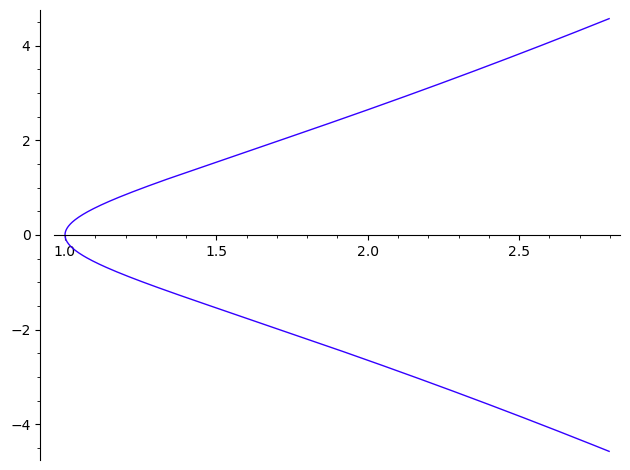

In [52]:
plot(E, rgbcolor=hue(0.7))

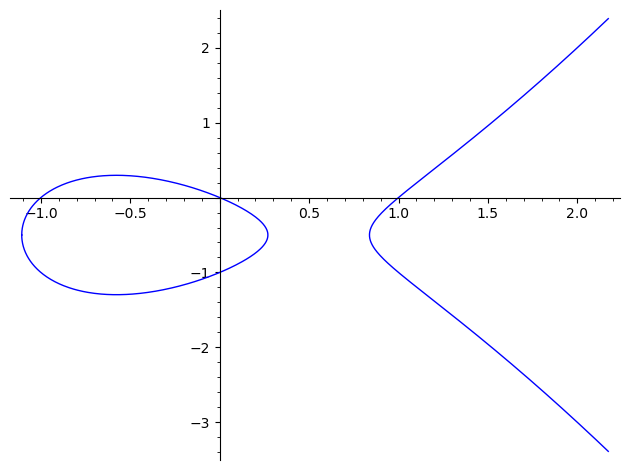

In [53]:
E = EllipticCurve('37a')
plot(E)                   

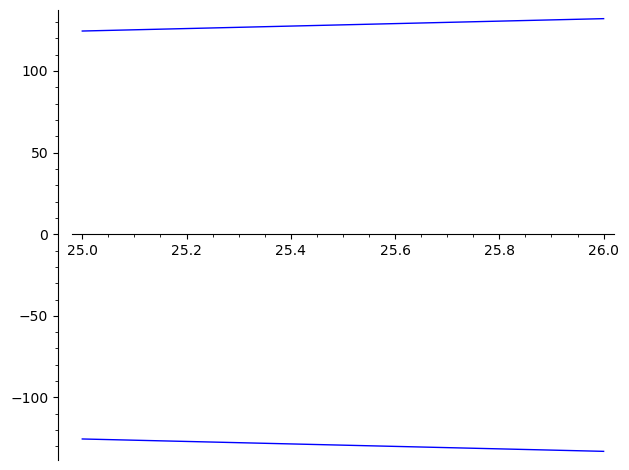

In [54]:
plot(E, xmin=25, xmax=26)  

In [58]:
E = EllipticCurve(QQ,[0,0,0,4,3])

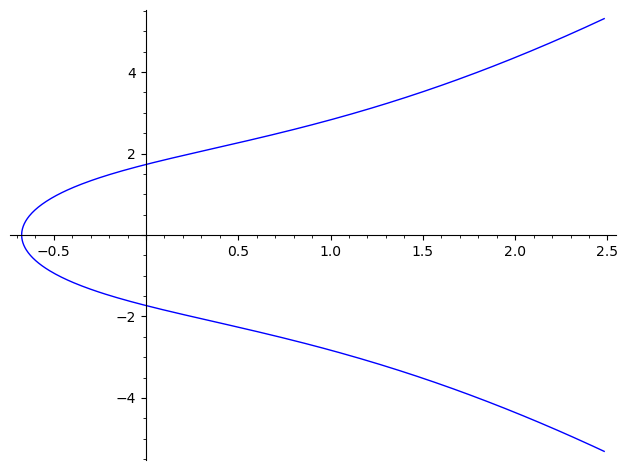

In [59]:
plot(E)

In [61]:
E(0)

(0 : 1 : 0)

In [ ]:


    

   

    

    def order(self):
        r"""
        Return the order of this point on the elliptic curve.

        If the point is zero, returns 1, otherwise raise a
        :class:`NotImplementedError`.

        For curves over number fields and finite fields, see below.

        .. NOTE::

            :meth:`additive_order` is a synonym for :meth:`order`

        EXAMPLES::

            sage: K.<t> = FractionField(PolynomialRing(QQ,'t'))
            sage: E = EllipticCurve([0, 0, 0, -t^2, 0])
            sage: P = E(t,0)
            sage: P.order()
            Traceback (most recent call last):
            ...
            NotImplementedError: Computation of order of a point not implemented
            over general fields.
            sage: E(0).additive_order()
            1
            sage: E(0).order() == 1
            True
        """
        if hasattr(self, "_order"):
            return self._order
        if self.is_zero():
            self._order = Integer(1)
            return self._order
        raise NotImplementedError("Computation of order of a point "
                                  "not implemented over general fields.")

    additive_order = order

    def curve(self):
        """
        Return the curve that this point is on.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1])
            sage: P.curve()
            Elliptic Curve defined by y^2 + y = x^3 + x^2 - 2*x over Rational Field
        """
        return self.scheme()

    def plot(self, **args):
        """
        Plot this point on an elliptic curve.

        INPUT:

        - ``**args`` -- all arguments get passed directly onto the point
          plotting function.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1])
            sage: P.plot(pointsize=30, rgbcolor=(1,0,0))                                # needs sage.plot
            Graphics object consisting of 1 graphics primitive
        """
        from sage.plot.point import point
        from sage.plot.text import text

        if self.is_zero():
            return text("$\\infty$", (-3, 3), **args)
        else:
            return point((self[0], self[1]), **args)

    def _add_(self, right):
        """
        Add self to right.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1]); Q = E([0,0])
            sage: P + Q
            (1 : 0 : 1)
            sage: P._add_(Q) == P + Q
            True

        Example to show that bug :issue:`4820` is fixed::

            sage: [type(c) for c in 2*EllipticCurve('37a1').gen(0)]
            [<... 'sage.rings.rational.Rational'>,
            <... 'sage.rings.rational.Rational'>,
            <... 'sage.rings.rational.Rational'>]

        Checks that :issue:`15964` is fixed::

            sage: N = 1715761513
            sage: E = EllipticCurve(Integers(N), [3,-13])
            sage: P = E(2,1)
            sage: LCM([2..60])*P
            Traceback (most recent call last):
            ...
            ZeroDivisionError: Inverse of 26927 does not exist
            (characteristic = 1715761513 = 26927*63719)

            sage: N = 35
            sage: E = EllipticCurve(Integers(N), [5,1])
            sage: P = E(0,1)
            sage: 4*P
            Traceback (most recent call last):
            ...
            ZeroDivisionError: Inverse of 7 does not exist
            (characteristic = 35 = 7*5)

        Checks that :issue:`34681` is fixed::

            sage: P+P
            (15 : 14 : 1)
            sage: 2*P
            (15 : 14 : 1)
        """
        # Use Prop 7.1.7 of Cohen "A Course in Computational Algebraic
        # Number Theory"
        if self.is_zero():
            return right
        if right.is_zero():
            return self
        E = self.curve()
        a1, a2, a3, a4, a6 = E.ainvs()
        x1, y1 = self[0], self[1]
        x2, y2 = right[0], right[1]
        if x1 == x2 and y1 == -y2 - a1*x2 - a3:
            return E(0)  # point at infinity

        if x1 == x2 and y1 == y2:
            try:
                m = (3*x1*x1 + 2*a2*x1 + a4 - a1*y1) / (2*y1 + a1*x1 + a3)
            except ZeroDivisionError:
                R = E.base_ring()
                if R.is_finite():
                    N = R.characteristic()
                    N1 = N.gcd(Integer(2*y1 + a1*x1 + a3))
                    N2 = N//N1
                    raise ZeroDivisionError("Inverse of %s does not exist (characteristic = %s = %s*%s)" % (2*y1 + a1*x1 + a3, N, N1, N2))
                else:
                    raise ZeroDivisionError("Inverse of %s does not exist" % (2*y1 + a1*x1 + a3))
        else:
            try:
                m = (y1-y2)/(x1-x2)
            except ZeroDivisionError:
                R = E.base_ring()
                if R.is_finite():
                    N = R.characteristic()
                    N1 = N.gcd(Integer(x1-x2))
                    N2 = N//N1
                    raise ZeroDivisionError("Inverse of %s does not exist (characteristic = %s = %s*%s)" % (x1-x2, N, N1, N2))
                else:
                    raise ZeroDivisionError("Inverse of %s does not exist" % (x1-x2))

        x3 = -x1 - x2 - a2 + m*(m+a1)
        y3 = -y1 - a3 - a1*x3 + m*(x1-x3)
        # See trac #4820 for why we need to coerce 1 into the base ring here:
        return E.point([x3, y3, E.base_ring()(1)], check=False)

    def _sub_(self, right):
        """
        Subtract right from  self.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1]); Q = E([0,0])
            sage: P - Q
            (4 : 8 : 1)
            sage: P - Q == P._sub_(Q)
            True
            sage: (P - Q) + Q
            (-1 : 1 : 1)
            sage: P
            (-1 : 1 : 1)
        """
        return self + (-right)

    def __neg__(self):
        """
        Return the additive inverse of this point.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1])
            sage: Q = -P; Q
            (-1 : -2 : 1)
            sage: Q + P
            (0 : 1 : 0)

        Example to show that bug :issue:`4820` is fixed::

            sage: [type(c) for c in -EllipticCurve('37a1').gen(0)]
            [<... 'sage.rings.rational.Rational'>,
             <... 'sage.rings.rational.Rational'>,
             <... 'sage.rings.rational.Rational'>]
        """
        if self.is_zero():
            return self
        E, x, y = self.curve(), self[0], self[1]
        # See trac #4820 for why we need to coerce 1 into the base ring here:
        return E.point([x, -y - E.a1()*x - E.a3(), E.base_ring()(1)], check=False)

    def xy(self):
        """
        Return the `x` and `y` coordinates of this point, as a 2-tuple.
        If this is the point at infinity, a :class:`ZeroDivisionError` is raised.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1])
            sage: P.xy()
            (-1, 1)
            sage: Q = E(0); Q
            (0 : 1 : 0)
            sage: Q.xy()
            Traceback (most recent call last):
            ...
            ZeroDivisionError: rational division by zero
        """
        if self[2].is_one():
            return self[0], self[1]
        else:
            return self[0]/self[2], self[1]/self[2]

    def x(self):
        """
        Return the `x` coordinate of this point, as an element of the base field.
        If this is the point at infinity, a :class:`ZeroDivisionError` is raised.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1])
            sage: P.x()
            -1
            sage: Q = E(0); Q
            (0 : 1 : 0)
            sage: Q.x()
            Traceback (most recent call last):
            ...
            ZeroDivisionError: rational division by zero
        """
        if self[2].is_one():
            return self[0]
        else:
            return self[0]/self[2]

    def y(self):
        """
        Return the `y` coordinate of this point, as an element of the base field.
        If this is the point at infinity, a :class:`ZeroDivisionError` is raised.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: P = E([-1,1])
            sage: P.y()
            1
            sage: Q = E(0); Q
            (0 : 1 : 0)
            sage: Q.y()
            Traceback (most recent call last):
            ...
            ZeroDivisionError: rational division by zero
        """
        if self[2].is_one():
            return self[1]
        else:
            return self[1]/self[2]

    def is_divisible_by(self, m):
        """
        Return True if there exists a point `Q` defined over the same
        field as self such that `mQ` == self.

        INPUT:

        - ``m`` -- a positive integer.

        OUTPUT:

        (bool) -- True if there is a solution, else False.

        .. WARNING::

            This function usually triggers the computation of the
            `m`-th division polynomial of the associated elliptic
            curve, which will be expensive if `m` is large, though it
            will be cached for subsequent calls with the same `m`.

        EXAMPLES::

            sage: E = EllipticCurve('389a')
            sage: Q = 5*E(0,0); Q
            (-2739/1444 : -77033/54872 : 1)
            sage: Q.is_divisible_by(4)
            False
            sage: Q.is_divisible_by(5)
            True

        A finite field example::

            sage: E = EllipticCurve(GF(101), [23,34])
            sage: E.cardinality().factor()
            2 * 53
            sage: Set([T.order() for T in E.points()])
            {1, 106, 2, 53}
            sage: len([T for T in E.points() if T.is_divisible_by(2)])
            53
            sage: len([T for T in E.points() if T.is_divisible_by(3)])
            106

        TESTS:

        This shows that the bug reported at :issue:`10076` is fixed::

            sage: # needs sage.rings.number_field
            sage: K = QuadraticField(8,'a')
            sage: E = EllipticCurve([K(0),0,0,-1,0])
            sage: P = E([-1,0])
            sage: P.is_divisible_by(2)
            False
            sage: P.division_points(2)
            []

        Note that it is not sufficient to test that
        ``self.division_points(m,poly_only=True)`` has roots::

            sage: P.division_points(2, poly_only=True).roots()                          # needs sage.rings.number_field
            [(1/2*a - 1, 1), (-1/2*a - 1, 1)]

            sage: # needs sage.rings.number_field
            sage: tor = E.torsion_points(); len(tor)
            8
            sage: [T.order() for T in tor]
            [1, 2, 4, 4, 2, 2, 4, 4]
            sage: all(T.is_divisible_by(3) for T in tor)
            True
            sage: sorted(T for T in tor if T.is_divisible_by(2))
            [(0 : 1 : 0), (1 : 0 : 1)]
            sage: sorted(Set([2*T for T in tor]))
            [(0 : 1 : 0), (1 : 0 : 1)]
        """
        # Coerce the input m to an integer
        m = Integer(m)

        # Check for trivial cases of m = 1, -1 and 0.
        if m == 1 or m == -1:
            return True
        if m == 0:
            return self == 0  # then m*self=self for all m!
        m = m.abs()

        # Now the following line would of course be correct, but we
        # work harder to be more efficient:
        # return len(self.division_points(m)) > 0

        P = self

        # If P has finite order n and gcd(m,n)=1 then the result is
        # True.  However, over general fields computing P.order() is
        # not implemented.

        try:
            n = P.order()
            if not n == oo:
                if m.gcd(n) == 1:
                    return True
        except NotImplementedError:
            pass

        P_is_2_torsion = (P == -P)
        g = P.division_points(m, poly_only=True)

        if not P_is_2_torsion:
            # In this case deg(g)=m^2, and each root in K lifts to two
            # points Q,-Q both in E(K), of which exactly one is a
            # solution.  So we just check the existence of roots:
            return len(g.roots()) > 0

        # Now 2*P==0

        if m % 2 == 1:
            return True  # P itself is a solution when m is odd

        # Now m is even and 2*P=0.  Roots of g in K may or may not
        # lift to solutions in E(K), so we fall back to the default.
        # Note that division polynomials are cached so this is not
        # inefficient:

        return len(self.division_points(m)) > 0

    def division_points(self, m, poly_only=False):
        r"""
        Return a list of all points `Q` such that `mQ=P` where `P` = ``self``.

        Only points on the elliptic curve containing self and defined
        over the base field are included.

        INPUT:

        - ``m`` -- a positive integer

        - ``poly_only`` -- bool (default: False); if True return
          polynomial whose roots give all possible `x`-coordinates of
          `m`-th roots of ``self``.

        OUTPUT:

        (list) -- a (possibly empty) list of solutions `Q` to `mQ=P`,
        where `P` = self.

        EXAMPLES:

        We find the five 5-torsion points on an elliptic curve::

            sage: E = EllipticCurve('11a'); E
            Elliptic Curve defined by y^2 + y = x^3 - x^2 - 10*x - 20 over Rational Field
            sage: P = E(0); P
            (0 : 1 : 0)
            sage: P.division_points(5)
            [(0 : 1 : 0), (5 : -6 : 1), (5 : 5 : 1), (16 : -61 : 1), (16 : 60 : 1)]

        Note above that 0 is included since [5]*0 = 0.

        We create a curve of rank 1 with no torsion and do a consistency check::

            sage: E = EllipticCurve('11a').quadratic_twist(-7)
            sage: Q = E([44,-270])
            sage: (4*Q).division_points(4)
            [(44 : -270 : 1)]

        We create a curve over a non-prime finite field with group of
        order `18`::

            sage: # needs sage.rings.finite_rings
            sage: k.<a> = GF((5,2))
            sage: E = EllipticCurve(k, [1,2+a,3,4*a,2])
            sage: P = E([3, 3*a+4])
            sage: factor(E.order())
            2 * 3^2
            sage: P.order()
            9

        We find the `1`-division points as a consistency check -- there
        is just one, of course::

            sage: P.division_points(1)                                                  # needs sage.rings.finite_rings
            [(3 : 3*a + 4 : 1)]

        The point `P` has order coprime to 2 but divisible by 3, so::

            sage: P.division_points(2)                                                  # needs sage.rings.finite_rings
            [(2*a + 1 : 3*a + 4 : 1), (3*a + 1 : a : 1)]

        We check that each of the 2-division points works as claimed::

            sage: [2*Q for Q in P.division_points(2)]                                   # needs sage.rings.finite_rings
            [(3 : 3*a + 4 : 1), (3 : 3*a + 4 : 1)]

        Some other checks::

            sage: P.division_points(3)                                                  # needs sage.rings.finite_rings
            []
            sage: P.division_points(4)                                                  # needs sage.rings.finite_rings
            [(0 : 3*a + 2 : 1), (1 : 0 : 1)]
            sage: P.division_points(5)                                                  # needs sage.rings.finite_rings
            [(1 : 1 : 1)]

        An example over a number field (see :issue:`3383`)::

            sage: # needs sage.rings.number_field
            sage: E = EllipticCurve('19a1')
            sage: x = polygen(ZZ, 'x')
            sage: K.<t> = NumberField(x^9 - 3*x^8 - 4*x^7 + 16*x^6 - 3*x^5
            ....:                     - 21*x^4 + 5*x^3 + 7*x^2 - 7*x + 1)
            sage: EK = E.base_extend(K)
            sage: E(0).division_points(3)
            [(0 : 1 : 0), (5 : -10 : 1), (5 : 9 : 1)]
            sage: EK(0).division_points(3)
            [(0 : 1 : 0), (5 : 9 : 1), (5 : -10 : 1)]
            sage: E(0).division_points(9)
            [(0 : 1 : 0), (5 : -10 : 1), (5 : 9 : 1)]
            sage: EK(0).division_points(9)
            [(0 : 1 : 0), (5 : 9 : 1), (5 : -10 : 1), (-150/121*t^8 + 414/121*t^7 + 1481/242*t^6 - 2382/121*t^5 - 103/242*t^4 + 629/22*t^3 - 367/242*t^2 - 1307/121*t + 625/121 : 35/484*t^8 - 133/242*t^7 + 445/242*t^6 - 799/242*t^5 + 373/484*t^4 + 113/22*t^3 - 2355/484*t^2 - 753/242*t + 1165/484 : 1), (-150/121*t^8 + 414/121*t^7 + 1481/242*t^6 - 2382/121*t^5 - 103/242*t^4 + 629/22*t^3 - 367/242*t^2 - 1307/121*t + 625/121 : -35/484*t^8 + 133/242*t^7 - 445/242*t^6 + 799/242*t^5 - 373/484*t^4 - 113/22*t^3 + 2355/484*t^2 + 753/242*t - 1649/484 : 1), (-1383/484*t^8 + 970/121*t^7 + 3159/242*t^6 - 5211/121*t^5 + 37/484*t^4 + 654/11*t^3 - 909/484*t^2 - 4831/242*t + 6791/484 : 927/121*t^8 - 5209/242*t^7 - 8187/242*t^6 + 27975/242*t^5 - 1147/242*t^4 - 1729/11*t^3 + 1566/121*t^2 + 12873/242*t - 10871/242 : 1), (-1383/484*t^8 + 970/121*t^7 + 3159/242*t^6 - 5211/121*t^5 + 37/484*t^4 + 654/11*t^3 - 909/484*t^2 - 4831/242*t + 6791/484 : -927/121*t^8 + 5209/242*t^7 + 8187/242*t^6 - 27975/242*t^5 + 1147/242*t^4 + 1729/11*t^3 - 1566/121*t^2 - 12873/242*t + 10629/242 : 1), (-4793/484*t^8 + 6791/242*t^7 + 10727/242*t^6 - 18301/121*t^5 + 2347/484*t^4 + 2293/11*t^3 - 7311/484*t^2 - 17239/242*t + 26767/484 : 30847/484*t^8 - 21789/121*t^7 - 34605/121*t^6 + 117164/121*t^5 - 10633/484*t^4 - 29437/22*t^3 + 39725/484*t^2 + 55428/121*t - 176909/484 : 1), (-4793/484*t^8 + 6791/242*t^7 + 10727/242*t^6 - 18301/121*t^5 + 2347/484*t^4 + 2293/11*t^3 - 7311/484*t^2 - 17239/242*t + 26767/484 : -30847/484*t^8 + 21789/121*t^7 + 34605/121*t^6 - 117164/121*t^5 + 10633/484*t^4 + 29437/22*t^3 - 39725/484*t^2 - 55428/121*t + 176425/484 : 1)]

        TESTS:

        Check that :issue:`24844` is fixed::

            sage: # needs sage.rings.finite_rings
            sage: p = next_prime(1000000)
            sage: E = EllipticCurve(GF(p), 123, 456)
            sage: pts = E(0).division_points(3)
            sage: P = pts[1]; P
            (389063 : 124244 : 1)
            sage: P._order
            3

        When we successfully divide a point known to have infinite
        order, the points returned know that they also have infinite
        order::

            sage: E = EllipticCurve([0,0,1,-1,0])
            sage: P = E(-1,0)
            sage: P.order()
            +Infinity
            sage: pts = P.division_points(3);  len(pts)
            1
            sage: [(Q,Q._order) for Q in pts]
            [((0 : -1 : 1), +Infinity)]

        When we successfully divide a point of known finite order `n`,
        the points returned know that they also have finite order `nk`
        for some divisor `k` of `m`::

          sage: E = EllipticCurve([1, 0, 1, -19, 26])
          sage: [(Q,Q._order) for Q in E(0).division_points(12)]
          [((0 : 1 : 0), 1),
           ((-5 : 2 : 1), 2),
           ((-2 : -7 : 1), 6),
           ((-2 : 8 : 1), 6),
           ((1 : -4 : 1), 6),
           ((1 : 2 : 1), 6),
           ((7/4 : -11/8 : 1), 2),
           ((3 : -2 : 1), 2),
           ((4 : -7 : 1), 3),
           ((4 : 2 : 1), 3),
           ((13 : -52 : 1), 6),
           ((13 : 38 : 1), 6)]
          sage: P = E(4,-7)
          sage: P.order()
          3
          sage: [(Q,Q._order) for Q in P.division_points(4)]
          [((-2 : -7 : 1), 6), ((1 : 2 : 1), 6), ((4 : -7 : 1), 3), ((13 : 38 : 1), 6)]
        """
        # Coerce the input m to an integer
        m = Integer(m)
        # Check for trivial cases of m = 1, -1 and 0.
        if m == 1 or m == -1:
            return [self]
        if m == 0:
            if self == 0:  # then every point Q is a solution, but...
                return [self]
            else:
                return []

        # ans will contain the list of division points.
        ans = []

        # We compute a polynomial g whose roots give all possible x
        # coordinates of the m-division points.  The number of
        # solutions (over the algebraic closure) is m^2, assuming that
        # the characteristic does not divide m.

        E = self.curve()
        P = self
        nP = -P
        P_is_2_torsion = (P == nP)

        # If self is the 0, then self is a solution, and the correct
        # poly is the m'th division polynomial
        if P == 0:
            ans.append(P)
            g = E.division_polynomial(m)
        else:
            # The poly g here is 0 at x(Q) iff x(m*Q) = x(P).
            g = E._multiple_x_numerator(m) - P[0]*E._multiple_x_denominator(m)

            # When 2*P=0, then -Q is a solution iff Q is.  For even m,
            # no 2-torsion point is a solution, so that g is the
            # square of a polynomial g1 of degree m^2/2, and each root
            # of g1 leads to a pair of solutions Q, -Q to m*Q=P.  For
            # odd m, P itself is the only 2-torsion solution, so g has
            # the form (x-x(P))*g1(x)^2 where g1 has degree (m^2-1)/2
            # and each root of g1 leads to a pair Q, -Q.

            if P_is_2_torsion:
                if m % 2 == 0:
                    # This computes g.sqrt() which is not implemented
                    g = g.gcd(g.derivative())*g.leading_coefficient().sqrt()

            # When 2*P!=0, then for each solution Q to m*Q=P, -Q is
            # not a solution (and points of order 2 are not
            # solutions).  Hence the roots of g are distinct and each
            # gives rise to precisely one solution Q.

                else:
                    g0 = g.variables()[0] - P[0]
                    g = g // g0
                    g = g.gcd(g.derivative())*g.leading_coefficient().sqrt()
                    g = g0*g

        if poly_only:
            return g

        for x in g.roots(multiplicities=False):
            if E.is_x_coord(x):
                # Make a point on the curve with this x coordinate.
                Q = E.lift_x(x)
                nQ = -Q
                mQ = m*Q
                # if P==-P then Q works iff -Q works, so we include
                # both unless they are equal:
                if P_is_2_torsion:
                    if mQ == P:
                        ans.append(Q)
                        if nQ != Q:
                            ans.append(nQ)
                else:
                    # P is not 2-torsion so at most one of Q, -Q works
                    # and we must try both:
                    if mQ == P:
                        ans.append(Q)
                    elif mQ == nP:
                        ans.append(nQ)

        if not ans:
            return ans

        # set orders of points found when self's order is known:
        if self.is_zero():
            self._order = Integer(1)
        try:
            n = self._order  # do not compute, just use if already known
            if n == oo:
                for Q in ans:
                    Q._order = oo
            else:
                mfac = m.factor()
                for Q in ans:
                    R = n * Q
                    Q._order = n * generic.order_from_multiple(R, m, factorization=mfac, operation='+')
        except AttributeError:  # do nothing about order if self's order unknown
            pass

        # Finally, sort and return
        ans.sort()
        return ans

    def _divide_out(self, p):
        r"""
        Return `(Q,k)` where `p^kQ` == self and `Q` cannot be divided by `p`.

        .. WARNING::

            It is up to the caller to make sure that this does not loop
            endlessly.  It is used in
            ``EllipticCurve_generic._p_primary_torsion_basis()``, when
            self will always have (finite) order which is a power of `p`,
            so that the order of `Q` increases by a factor of `p` at each
            stage.

            Since it will clearly be in danger of looping when
            self.is_zero(), this case is caught, but otherwise caveat
            user.

        EXAMPLES::

            sage: E = EllipticCurve('37a1')
            sage: P = E([0, 0])
            sage: R = 12*P
            sage: R._divide_out(2)
            ((-1 : -1 : 1), 2)
            sage: R._divide_out(3)
            ((2 : -3 : 1), 1)
            sage: R._divide_out(5)
            ((1357/841 : 28888/24389 : 1), 0)
            sage: R._divide_out(12)
            Traceback (most recent call last):
            ...
            ValueError: p (=12) should be prime.
        """
        p = Integer(p)
        if not p.is_prime():
            raise ValueError("p (=%s) should be prime." % p)

        if self.is_zero():
            raise ValueError("self must not be 0.")

        k = 0
        Q = self
        pts = Q.division_points(p)
        while pts:
            Q = pts[0]
            k += 1
            pts = Q.division_points(p)
        return (Q, k)

    def set_order(self, value=None, *, multiple=None, check=True):
        r"""
        Set the cached order of this point (i.e., the value of
        ``self._order``) to the given ``value``.

        Alternatively, when ``multiple`` is given, this method will
        first run :func:`~sage.groups.generic.order_from_multiple`
        to determine the exact order from the given multiple of the
        point order, then cache the result.

        Use this when you know a priori the order of this point, or
        a multiple of the order, to avoid a potentially expensive
        order calculation.

        INPUT:

        - ``value`` -- positive integer
        - ``multiple`` -- positive integer; mutually exclusive with ``value``

        OUTPUT: ``None``

        EXAMPLES:

        This example illustrates basic usage.

        ::

            sage: E = EllipticCurve(GF(7), [0, 1])  # This curve has order 12
            sage: G = E(5, 0)
            sage: G.set_order(2)
            sage: 2*G
            (0 : 1 : 0)
            sage: G = E(0, 6)
            sage: G.set_order(multiple=12)
            sage: G._order
            3

        We now give a more interesting case, the NIST-P521 curve. Its
        order is too big to calculate with Sage, and takes a long time
        using other packages, so it is very useful here.

        ::

            sage: # needs sage.rings.finite_rings
            sage: p = 2^521 - 1
            sage: prev_proof_state = proof.arithmetic()
            sage: proof.arithmetic(False)  # turn off primality checking
            sage: F = GF(p)
            sage: A = p - 3
            sage: B = 1093849038073734274511112390766805569936207598951683748994586394495953116150735016013708737573759623248592132296706313309438452531591012912142327488478985984
            sage: q = 6864797660130609714981900799081393217269435300143305409394463459185543183397655394245057746333217197532963996371363321113864768612440380340372808892707005449
            sage: E = EllipticCurve([F(A), F(B)])
            sage: G = E.random_point()
            sage: G.set_order(q)
            sage: G.order() * G  # This takes practically no time.
            (0 : 1 : 0)
            sage: proof.arithmetic(prev_proof_state) # restore state

        Using ``.set_order()`` with a ``multiple=`` argument can
        be used to compute a point's order *significantly* faster
        than calling :meth:`order` if the point is already known
        to be `m`-torsion::

            sage: F.<a> = GF((10007, 23))
            sage: E = EllipticCurve(F, [9,9])
            sage: n = E.order()
            sage: m = 5 * 47 * 139 * 1427 * 2027 * 4831 * 275449 * 29523031
            sage: assert m.divides(n)
            sage: P = n/m * E.lift_x(6747+a)
            sage: assert m * P == 0
            sage: P.set_order(multiple=m)   # compute exact order
            sage: factor(m // P.order())    # order is now cached
            47 * 139

        The algorithm used internally for this functionality is
        :meth:`~sage.groups.generic.order_from_multiple`.
        Indeed, simply calling :meth:`order` on ``P`` would take
        much longer since factoring ``n`` is fairly expensive::

            sage: n == m * 6670822796985115651 * 441770032618665681677 * 9289973478285634606114927
            True

        It is an error to pass a ``value`` equal to `0`::

            sage: # needs sage.rings.finite_rings
            sage: E = EllipticCurve(GF(7), [0, 1])  # This curve has order 12
            sage: G = E.random_point()
            sage: G.set_order(0)
            Traceback (most recent call last):
            ...
            ValueError: Value 0 illegal for point order
            sage: G.set_order(1000)
            Traceback (most recent call last):
            ...
            ValueError: Value 1000 illegal: outside max Hasse bound

        It is also very likely an error to pass a value which is not the actual
        order of this point. How unlikely is determined by the factorization of
        the actual order, and the actual group structure::

            sage: E = EllipticCurve(GF(7), [0, 1])  # This curve has order 12
            sage: G = E(5, 0)   # G has order 2
            sage: G.set_order(11)
            Traceback (most recent call last):
            ...
            ValueError: Value 11 illegal: 11 * (5 : 0 : 1) is not the identity

        However, ``set_order`` can be fooled. For instance, the order
        can be set to a multiple the actual order::

            sage: E = EllipticCurve(GF(7), [0, 1])  # This curve has order 12
            sage: G = E(5, 0)   # G has order 2
            sage: G.set_order(8)
            sage: G.order()
            8

        TESTS:

        Check that some invalid inputs are caught::

            sage: E = EllipticCurve(GF(101), [5,5])
            sage: P = E.lift_x(11)
            sage: P.set_order(17, multiple=119)
            Traceback (most recent call last):
            ...
            ValueError: cannot pass both value and multiple
            sage: P.set_order(17)
            sage: P.set_order(multiple=119+1)
            Traceback (most recent call last):
            ...
            ValueError: previously cached order 17 does not divide given multiple 120
            sage: P.set_order(119)
            Traceback (most recent call last):
            ...
            ValueError: value 119 contradicts previously cached order 17

        AUTHORS:

        - Mariah Lenox (2011-02-16)
        - Lorenz Panny (2022): add ``multiple=`` option
        """
        if multiple is not None:
            if value is not None:
                raise ValueError('cannot pass both value and multiple')

            if hasattr(self, '_order'):  # already known
                if check and not self._order.divides(multiple):
                    raise ValueError(f'previously cached order {self._order} does not divide given multiple {multiple}')
                return

            from sage.groups.generic import order_from_multiple
            value = order_from_multiple(self, multiple, check=check)
            check = False

        value = Integer(value)

        if check:
            if value <= 0:
                raise ValueError('Value %s illegal for point order' % value)
            E = self.curve()
            q = E.base_ring().cardinality()
            if q < oo:
                _, hi = Hasse_bounds(q)
                if value > hi:
                    raise ValueError('Value %s illegal: outside max Hasse bound' % value)
            if value * self != E(0):
                raise ValueError('Value %s illegal: %s * %s is not the identity' % (value, value, self))
            if hasattr(self, '_order') and self._order != value:  # already known
                raise ValueError(f'value {value} contradicts previously cached order {self._order}')

        self._order = value

    # #############################  end  ################################

    def _line_(self, R, Q):
        r"""
        Computes the value at `Q` of a straight line through points
        self and `R`.

        INPUT:

        - ``R, Q`` -- points on self.curve() with ``Q`` nonzero.

        OUTPUT:

        An element of the base field self.curve().base_field().
        A ValueError is raised if ``Q`` is zero.

        EXAMPLES::

            sage: # needs sage.rings.finite_rings
            sage: F.<a> = GF((2,5))
            sage: E = EllipticCurve(F,[0,0,1,1,1])
            sage: P = E(a^4 + 1, a^3)
            sage: Q = E(a^4, a^4 + a^3)
            sage: O = E(0)
            sage: P._line_(P,-2*P) == 0
            True
            sage: P._line_(Q,-(P+Q)) == 0
            True
            sage: O._line_(O,Q) == F(1)
            True
            sage: P._line_(O,Q) == a^4 - a^4 + 1
            True
            sage: P._line_(13*P,Q) == a^4
            True
            sage: P._line_(P,Q) == a^4 + a^3 + a^2 + 1
            True

        See :issue:`7116`::

            sage: P._line_ (Q,O)                                                        # needs sage.rings.finite_rings
            Traceback (most recent call last):
            ...
            ValueError: Q must be nonzero.

        .. NOTE::

            This function is used in _miller_ algorithm.

        AUTHORS:

        - David Hansen (2009-01-25)
        """
        if Q.is_zero():
            raise ValueError("Q must be nonzero.")

        if self.is_zero() or R.is_zero():
            if self == R:
                return self.curve().base_field().one()
            if self.is_zero():
                return Q[0] - R[0]
            if R.is_zero():
                return Q[0] - self[0]
        elif self != R:
            if self[0] == R[0]:
                return Q[0] - self[0]
            else:
                l = (R[1] - self[1])/(R[0] - self[0])
                return Q[1] - self[1] - l * (Q[0] - self[0])
        else:
            a1, a2, a3, a4, a6 = self.curve().a_invariants()
            numerator = (3*self[0]**2 + 2*a2*self[0] + a4 - a1*self[1])
            denominator = (2*self[1] + a1*self[0] + a3)
            if denominator == 0:
                return Q[0] - self[0]
            else:
                l = numerator/denominator
                return Q[1] - self[1] - l * (Q[0] - self[0])